<a href="https://colab.research.google.com/github/ent-r/SEC202/blob/master/Threat_Modeling_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import json
import pickle
from pathlib import Path

# Classes

class Asset:
    def __init__(self, name, value):
        self.name = name
        self.value = value

    def __str__(self):
        return f"Asset(name={self.name}, value={self.value})"

    def to_dict(self):
        return {"name": self.name, "value": self.value}

class AccessPoint:
    def __init__(self, name, trust_level):
        self.name = name
        self.trust_level = trust_level

    def __str__(self):
        return f"AccessPoint(name={self.name}, trust_level={self.trust_level})"

    def to_dict(self):
        return {"name": self.name, "trust_level": self.trust_level}

class Threat:
    def __init__(self, id, category, description):
        self.id = id
        self.category = category
        self.description = description

    def __str__(self):
        return f"Threat(id={self.id}, category={self.category}, description={self.description})"

    def to_dict(self):
        return {"id": self.id, "category": self.category, "description": self.description}

class ThreatEvaluation:
    def __init__(self, name, damage, reproducibility, exploitability, affected_users, discoverability):
        self.name = name
        self.damage = damage
        self.reproducibility = reproducibility
        self.exploitability = exploitability
        self.affected_users = affected_users
        self.discoverability = discoverability

    def total_risk(self):
        return self.damage + self.reproducibility + self.exploitability + self.affected_users + self.discoverability

    def __str__(self):
        return f"ThreatEvaluation(name={self.name}, total_risk={self.total_risk()})"

    def to_dict(self):
        return {
            "name": self.name,
            "damage": self.damage,
            "reproducibility": self.reproducibility,
            "exploitability": self.exploitability,
            "affected_users": self.affected_users,
            "discoverability": self.discoverability
        }

class Countermeasure:
    def __init__(self, threat_name, countermeasure):
        self.threat_name = threat_name
        self.countermeasure = countermeasure

    def __str__(self):
        return f"Countermeasure(threat_name={self.threat_name}, countermeasure={self.countermeasure})"

    def to_dict(self):
        return {"threat": self.threat_name, "countermeasure": self.countermeasure}

class ThreatModel:
    def __init__(self):
        self.filepath = Path('threat_model.json')
        self.assets = [
            Asset("Capteur de pression d'eau", "High"),
            Asset("Réservoir", "High"),
        ]
        self.access_points = [
            AccessPoint("Ports USB pour la maintenance des capteurs", "Low"),
            AccessPoint("Interfaces web pour la gestion des réservoirs", "Medium"),
        ]
        self.threats = [
            Threat(248, "Denial of Service", "Data Store Inaccessible"),
            Threat(289, "Repudiation", "Data Store Denies Gateway Potentially Writing Data"),
        ]
        self.threats_dread = [
            ThreatEvaluation("Usurpation d'identité des opérateurs", 3, 2, 2, 3, 1),
            ThreatEvaluation("Modification non autorisée des données des capteurs", 2, 3, 3, 3, 2),
        ]
        self.countermeasures = [
            Countermeasure("Usurpation d'identité des opérateurs", "Mettre en place des mécanismes d'authentification robustes"),
            Countermeasure("Modification non autorisée des données des capteurs", "Utiliser des techniques de durcissement des applications et des dispositifs"),
        ]

    def save(self):
        data = {
            "assets": [asset.to_dict() for asset in self.assets],
            "access_points": [ap.to_dict() for ap in self.access_points],
            "threats": [threat.to_dict() for threat in self.threats],
            "evaluations": [eval.to_dict() for eval in self.threats_dread],
            "countermeasures": [cm.to_dict() for cm in self.countermeasures]
        }

        with open(self.filepath, 'w') as f:
            json.dump(data, f, indent=4)

    def load(self):
        if self.filepath.exists():
            with open(self.filepath, 'r') as f:
                data = json.load(f)
                self.assets = [Asset(**a) for a in data.get('assets', [])]
                self.access_points = [AccessPoint(**ap) for ap in data.get('access_points', [])]
                self.threats = [Threat(**t) for t in data.get('threats', [])]
                self.threats_dread = [ThreatEvaluation(**eval) for eval in data.get('evaluations', [])]
                self.countermeasures = [Countermeasure(**cm) for cm in data.get('countermeasures', [])]

    def __str__(self):
        return (f"ThreatModel(Assets={len(self.assets)}, AccessPoints={len(self.access_points)}, "
                f"Threats={len(self.threats)}, ThreatsDREAD={len(self.threats_dread)}, "
                f"Countermeasures={len(self.countermeasures)})")

    def add_asset(self, name, value):
        self.assets.append(Asset(name, value))

    def modify_asset(self, index, name, value):
        if 0 <= index < len(self.assets):
            self.assets[index] = Asset(name, value)

    def delete_asset(self, index):
        if 0 <= index < len(self.assets):
            del self.assets[index]

    def add_access_point(self, name, trust_level):
        self.access_points.append(AccessPoint(name, trust_level))

    def modify_access_point(self, index, name, trust_level):
        if 0 <= index < len(self.access_points):
            self.access_points[index] = AccessPoint(name, trust_level)

    def delete_access_point(self, index):
        if 0 <= index < len(self.access_points):
            del self.access_points[index]

    def add_threat(self, id, category, description):
        self.threats.append(Threat(id, category, description))

    def modify_threat(self, index, id, category, description):
        if 0 <= index < len(self.threats):
            self.threats[index] = Threat(id, category, description)

    def delete_threat(self, index):
        if 0 <= index < len(self.threats):
            del self.threats[index]

    def add_evaluation(self, name, damage, reproducibility, exploitability, affected_users, discoverability):
        self.threats_dread.append(ThreatEvaluation(name, damage, reproducibility, exploitability, affected_users, discoverability))

    def modify_evaluation(self, index, name, damage, reproducibility, exploitability, affected_users, discoverability):
        if 0 <= index < len(self.threats_dread):
            self.threats_dread[index] = ThreatEvaluation(name, damage, reproducibility, exploitability, affected_users, discoverability)

    def delete_evaluation(self, index):
        if 0 <= index < len(self.threats_dread):
            del self.threats_dread[index]

    def add_countermeasure(self, threat_name, countermeasure):
        self.countermeasures.append(Countermeasure(threat_name, countermeasure))

    def modify_countermeasure(self, index, threat_name, countermeasure):
        if 0 <= index < len(self.countermeasures):
            self.countermeasures[index] = Countermeasure(threat_name, countermeasure)

    def delete_countermeasure(self, index):
        if 0 <= index < len(self.countermeasures):
            del self.countermeasures[index]

    def manage_elements(self):
        while True:
            print("Choisissez l'élément que vous souhaitez ajouter ou 'exit' pour quitter :")
            print("1. Nouvel actif")
            print("2. Nouveau point d'accès")
            print("3. Nouvelle menace")
            print("4. Nouvelle évaluation de DREAD")
            print("5. Nouvelle mesure de contre-mesure")
            choice = input("Votre choix : ")
            if choice == 'exit':
                break
            elif choice == '1':
                for i, asset in enumerate(self.assets, start=1):
                    print(f"{i}. {asset.name} (Value: {asset.value})")
                index = int(input("Choisissez l'actif par numéro : ")) - 1
                if 0 <= index < len(self.assets):
                    name = input(f"Entrez le nouveau nom pour l'actif '{self.assets[index].name}' : ")
                    value = input(f"Entrez la nouvelle valeur pour l'actif '{self.assets[index].name}' : ")
                    self.modify_asset(index, name, value)
            elif choice == '2':
                for i, ap in enumerate(self.access_points, start=1):
                    print(f"{i}. {ap.name} (Trust Level: {ap.trust_level})")
                index = int(input("Choisissez le point d'accès par numéro : ")) - 1
                if 0 <= index < len(self.access_points):
                    name = input(f"Entrez le nouveau nom pour le point d'accès '{self.access_points[index].name}' : ")
                    trust_level = input(f"Entrez le nouveau niveau de confiance pour le point d'accès '{self.access_points[index].name}' : ")
                    self.modify_access_point(index, name, trust_level)
            elif choice == '3':
                for i, threat in enumerate(self.threats, start=1):
                    print(f"{i}. {threat.id} - {threat.category} ({threat.description})")
                index = int(input("Choisissez la menace par numéro : ")) - 1
                if 0 <= index < len(self.threats):
                    id = input(f"Entrez le nouvel ID pour la menace '{self.threats[index].id}' : ")
                    category = input(f"Entrez la nouvelle catégorie pour la menace '{self.threats[index].category}' : ")
                    description = input(f"Entrez la nouvelle description pour la menace '{self.threats[index].description}' : ")
                    self.modify_threat(index, id, category, description)
            elif choice == '4':
                for i, eval in enumerate(self.threats_dread, start=1):
                    print(f"{i}. {eval.name} (Damage: {eval.damage}, Reproducibility: {eval.reproducibility}, "
                          f"Exploitability: {eval.exploitability}, Affected Users: {eval.affected_users}, "
                          f"Discoverability: {eval.discoverability})")
                index = int(input("Choisissez l'évaluation par numéro : ")) - 1
                if 0 <= index < len(self.threats_dread):
                    name = input(f"Entrez le nouveau nom pour l'évaluation '{self.threats_dread[index].name}' : ")
                    damage = int(input(f"Entrez la nouvelle gravité pour l'évaluation '{self.threats_dread[index].damage}' : "))
                    reproducibility = int(input(f"Entrez la nouvelle reproductibilité pour l'évaluation '{self.threats_dread[index].reproducibility}' : "))
                    exploitability = int(input(f"Entrez la nouvelle exploitabilité pour l'évaluation '{self.threats_dread[index].exploitability}' : "))
                    affected_users = int(input(f"Entrez le nouveau nombre d'utilisateurs affectés pour l'évaluation '{self.threats_dread[index].affected_users}' : "))
                    discoverability = int(input(f"Entrez la nouvelle découvrabilité pour l'évaluation '{self.threats_dread[index].discoverability}' : "))
                    self.modify_evaluation(index, name, damage, reproducibility, exploitability, affected_users, discoverability)
            elif choice == '5':
                for i, cm in enumerate(self.countermeasures, start=1):
                    print(f"{i}. {cm.threat_name} - {cm.countermeasure}")
                index = int(input("Choisissez la mesure de contre-mesure par numéro : ")) - 1
                if 0 <= index < len(self.countermeasures):
                    threat_name = input(f"Entrez le nouveau nom pour la menace '{self.countermeasures[index].threat_name}' : ")
                    countermeasure = input(f"Entrez la nouvelle contre-mesure pour la menace '{self.countermeasures[index].threat_name}' : ")
                    self.modify_countermeasure(index, threat_name, countermeasure)
            else:
                print("Choix invalide, veuillez réessayer.")


    def load(self, filepath):
        # Logic pour charger le modèle depuis le fichier
        # Par exemple :
        with open(filepath, 'r') as file:
            self.model_data = json.load(file)  # ou d'autres opérations nécessaires pour charger votre modèle

    def show_all(self):
        print("Assets:")
        for asset in self.assets:
            print(asset)
        print("\nAccess Points:")
        for ap in self.access_points:
            print(ap)
        print("\nThreats:")
        for threat in self.threats:
            print(threat)
        print("\nThreat Evaluations:")
        for eval in self.threats_dread:
            print(eval)
        print("\nCountermeasures:")
        for cm in self.countermeasures:
            print(cm)

if __name__ == "__main__":
    model = ThreatModel()

    while True:
        print("\nActions disponibles:")
        print("1. Charger un modèle")
        print("2. Sauvegarder le modèle")
        print("3. Gérer les éléments")
        print("4. Montrer tous les éléments")
        print("5. Quitter")
        action = input("Votre choix : ")

        if action == '1':
            filepath = input("Entrez le chemin du fichier à charger (ou laissez vide pour 'threat_model.json') : ")
            model.load(filepath if filepath else 'threat_model.json')
            print("Modèle chargé avec succès.")


            print("Modèle chargé avec succès.")
        elif action == '2':
            model.save()
            print("Modèle sauvegardé avec succès.")
        elif action == '3':
            model.manage_elements()
        elif action == '4':
            model.show_all()
        elif action == '5':
            break
        else:
            print("Choix invalide, veuillez réessayer.")



Actions disponibles:
1. Charger un modèle
2. Sauvegarder le modèle
3. Gérer les éléments
4. Montrer tous les éléments
5. Quitter
Votre choix : "
Choix invalide, veuillez réessayer.

Actions disponibles:
1. Charger un modèle
2. Sauvegarder le modèle
3. Gérer les éléments
4. Montrer tous les éléments
5. Quitter
Votre choix : 3
Choisissez l'élément que vous souhaitez ajouter ou 'exit' pour quitter :
1. Nouvel actif
2. Nouveau point d'accès
3. Nouvelle menace
4. Nouvelle évaluation de DREAD
5. Nouvelle mesure de contre-mesure
Votre choix : 1
1. Capteur de pression d'eau (Value: High)
2. Réservoir (Value: High)
Choisissez l'actif par numéro : 1
Entrez le nouveau nom pour l'actif 'Capteur de pression d'eau' : az
Entrez la nouvelle valeur pour l'actif 'Capteur de pression d'eau' : 123
Choisissez l'élément que vous souhaitez ajouter ou 'exit' pour quitter :
1. Nouvel actif
2. Nouveau point d'accès
3. Nouvelle menace
4. Nouvelle évaluation de DREAD
5. Nouvelle mesure de contre-mesure
Votre cho

KeyboardInterrupt: Interrupted by user

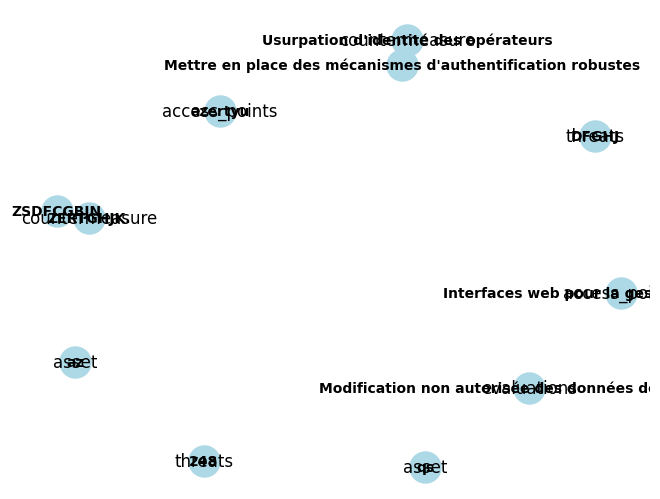

In [91]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Fonction pour charger et structurer les données du fichier JSON
def load_data(filepath):
    try:
        with open(filepath, 'r') as file:
            data = json.load(file)
        return data
    except FileNotFoundError:
        print(f"Le fichier {filepath} n'a pas été trouvé.")
        return None
    except json.JSONDecodeError:
        print("Erreur de décodage JSON. Veuillez vérifier le format du fichier.")
        return None

# Fonction pour créer le graphe
def create_graph(data):
    if not data:
        print("Aucune donnée à traiter.")
        return None

    G = nx.Graph()

    # Vérifier les clés disponibles dans le JSON
    if 'assets' in data:
        # Ajouter les noeuds pour Assets
        for asset in data['assets']:
            G.add_node(asset['name'], type='asset', value=asset['value'])
    else:
        print("Section 'assets' manquante dans le fichier JSON.")

    if 'access_points' in data:
        # Ajouter les noeuds pour Access Points
        for ap in data['access_points']:
            G.add_node(ap['name'], type='access_points', trust_level=ap['trust_level'])
    else:
        print("Section 'access_points' manquante dans le fichier JSON.")

    if 'threats' in data:
        # Ajouter les noeuds pour Threats
        for threat in data['threats']:
            G.add_node(threat['id'], type='threats', category=threat['category'], description=threat['description'])
    else:
        print("Section 'threats' manquante dans le fichier JSON.")

    if 'evaluations' in data:
        # Ajouter les noeuds pour Threat Evaluations
        for evaluation in data['evaluations']:
            G.add_node(evaluation['name'], type='evaluations', total_risk=evaluation['damage'])
    else:
        print("Section 'Threat Evaluations' manquante dans le fichier JSON.")

    if 'countermeasures' in data:
        # Ajouter les noeuds pour Countermeasures
        for countermeasure in data['countermeasures']:
            G.add_node(countermeasure['threat'], type='countermeasure', description=countermeasure['countermeasure'])
            # Ajouter les liens entre les noeuds en fonction des relations
            G.add_edge(countermeasure['threat'], countermeasure['countermeasure'])
    else:
        print("Section 'Countermeasures' manquante dans le fichier JSON.")

    return G

# Fonction pour afficher le graphe
def display_graph(G):
    if G is None:
        print("Le graphe n'a pas pu être créé.")
        return

    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'type')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_labels(G, pos, labels=labels)
    plt.show()

data = load_data('/content/threat_model.json')
graph = create_graph(data)
display_graph(graph)


In [89]:
import json

# Fonction pour afficher le contenu d'un fichier JSON
def display_json_content(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
        print(json.dumps(data, indent=4))  # Affiche les données JSON de manière lisible avec un retrait

display_json_content('/content/threat_model.json')


{
    "assets": [
        {
            "name": "az",
            "value": "123"
        },
        {
            "name": "qs",
            "value": "134"
        }
    ],
    "access_points": [
        {
            "name": "azertyu",
            "trust_level": "1234567"
        },
        {
            "name": "Interfaces web pour la gestion des r\u00e9servoirs",
            "trust_level": "Medium"
        }
    ],
    "threats": [
        {
            "id": 248,
            "category": "Denial of Service",
            "description": "Data Store Inaccessible"
        },
        {
            "id": "DFGHJ",
            "category": "345678",
            "description": "ERTYFGHB"
        }
    ],
    "evaluations": [
        {
            "name": "Usurpation d'identit\u00e9 des op\u00e9rateurs",
            "damage": 3,
            "reproducibility": 2,
            "exploitability": 2,
            "affected_users": 3,
            "discoverability": 1
        },
        {
            "n

In [52]:
import json
import pandas as pd
from pathlib import Path

# Classes

class Asset:
    def __init__(self, name, value):
        self.name = name
        self.value = value

    def __str__(self):
        return f"Asset(name={self.name}, value={self.value})"


    def to_dict(self):
        return {"name": self.name, "value": self.value}


class AccessPoint:
    def __init__(self, name, trust_level):
        self.name = name
        self.trust_level = trust_level

    def __str__(self):
        return f"AccessPoint(name={self.name}, trust_level={self.trust_level})"

    def to_dict(self):
        return {"name": self.name, "trust_level": self.trust_level}

class Threat:
    def __init__(self, id, category, description):
        self.id = id
        self.category = category
        self.description = description

    def __str__(self):
        return f"Threat(id={self.id}, category={self.category}, description={self.description})"


class ThreatEvaluation:
    def __init__(self, name, damage, reproducibility, exploitability, affected_users, discoverability):
        self.name = name
        self.damage = damage
        self.reproducibility = reproducibility
        self.exploitability = exploitability
        self.affected_users = affected_users
        self.discoverability = discoverability

    def total_risk(self):
        return self.damage + self.reproducibility + self.exploitability + self.affected_users + self.discoverability

    def __str__(self):
        return f"ThreatEvaluation(name={self.name}, total_risk={self.total_risk()})"

    def to_dict(self):
        return {
            "name": self.name,
            "damage": self.damage,
            "reproducibility": self.reproducibility,
            "exploitability": self.exploitability,
            "affected_users": self.affected_users,
            "discoverability": self.discoverability
        }



class Countermeasure:
    def __init__(self, threat_name, countermeasure):
        self.threat_name = threat_name
        self.countermeasure = countermeasure

    def __str__(self):
        return f"Countermeasure(threat_name={self.threat_name}, countermeasure={self.countermeasure})"


class ThreatModel:
    def __init__(self):

        self.filepath = Path('threat_model.json')
        self.assets = [
            {"name": "Capteur de pression d'eau", "value": "High"},
            {"name": "Réservoir", "value": "High"},
            {"name": "Pompe", "value": "Medium"},
            {"name": "Vanne", "value": "Medium"},
            {"name": "Système de contrôle SCADA", "value": "High"},
            {"name": "Logiciel de gestion des ressources en eau", "value": "High"},
            {"name": "Réseau de communication", "value": "High"},
            {"name": "Opérateur", "value": "High"},
            {"name": "Administrateur", "value": "High"},
            {"name": "Utilisateur final", "value": "Medium"}
        ]
        self.access_points = [
            {"name": "Ports USB pour la maintenance des capteurs", "trust_level": "Low"},
            {"name": "Interfaces web pour la gestion des réservoirs", "trust_level": "Medium"},
            {"name": "Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs", "trust_level": "High"},
            {"name": "Fichiers de configuration des dispositifs SCADA", "trust_level": "High"}
        ]
        self.threats = [
            {"id": 248, "category": "Denial of Service", "description": "Data Store Inaccessible"},
            {"id": 289, "category": "Repudiation", "description": "Data Store Denies Gateway Potentially Writing Data"},
            {"id": 329, "category": "Elevation of Privilege", "description": "Elevation by Changing the Execution Flow in Application Server"},
            {"id": 330, "category": "Elevation of Privilege", "description": "Cross-site Request Forgery"},
            {"id": 339, "category": "Repudiation", "description": "Potential Data Repudiation by Application Server"},
            {"id": 358, "category": "Tampering", "description": "Application Server Process Memory Tampered"},
            {"id": 366, "category": "Spoofing", "description": "Spoofing the SCADA Server Process"},
            {"id": 367, "category": "Tampering", "description": "Cross-site Scripting"},
            {"id": 371, "category": "Elevation of Privilege", "description": "Elevation Using Impersonation"},
            {"id": 383, "category": "Spoofing", "description": "Spoofing the Human User External Entity"},
            {"id": 386, "category": "Denial of Service", "description": "Potential Process Crash or Stop for SCADA Server"},
            {"id": 389, "category": "Elevation of Privilege", "description": "SCADA Server May be Subject to Elevation of Privilege Using Remote Code Execution"},
            {"id": 392, "category": "Spoofing", "description": "Spoofing of Destination Data Store Controller"},
            {"id": 393, "category": "Tampering", "description": "The Controller Data Store Could Be Corrupted"},
            {"id": 398, "category": "Denial of Service", "description": "Data Flow Serial Communication Is Potentially Interrupted"},
            {"id": 407, "category": "Information Disclosure", "description": "Weak Credential Transit"}
        ]
        self.threats_dread = [
            {"name": "Usurpation d'identité des opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 1},
            {"name": "Modification non autorisée des données des capteurs", "damage": 2, "reproducibility": 3, "exploitability": 3, "affected_users": 3, "discoverability": 2},
            {"name": "Négation des actions effectuées par les opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 2},
            {"name": "Divulgation non autorisée des données de pression d'eau", "damage": 3, "reproducibility": 3, "exploitability": 2, "affected_users": 2, "discoverability": 1},
            {"name": "Interruption des communications entre les capteurs et les contrôleurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 3},
            {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "damage": 1, "reproducibility": 2, "exploitability": 2, "affected_users": 2, "discoverability": 2}
        ]
        self.countermeasures = [
            {"threat": "Usurpation d'identité des opérateurs", "countermeasure": "Mettre en place des mécanismes d'authentification robustes"},
            {"threat": "Modification non autorisée des données des capteurs", "countermeasure": "Utiliser des techniques de durcissement des applications et des dispositifs"},
            {"threat": "Négation des actions effectuées par les opérateurs", "countermeasure": "Mettre en place des journaux d'audit et des mécanismes de non-répudiation"},
            {"threat": "Divulgation non autorisée des données de pression d'eau", "countermeasure": "Utiliser des techniques de chiffrement et de ségrégation des données"},
            {"threat": "Interruption des communications entre les capteurs et les contrôleurs", "countermeasure": "Mettre en place des mécanismes de redondance et de gestion des ressources"},
            {"threat": "Élévation des privilèges non autorisée des utilisateurs finaux", "countermeasure": "Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance"}
        ]


    def save(self):
        # Save the state of the ThreatModel to a file
        with open('threat_model.pkl', 'wb') as file:
            pickle.dump(self, file)

    def load(self):
        # Load the state of the ThreatModel from a file
        try:
            with open('threat_model.pkl', 'rb') as file:
                model = pickle.load(file)
                self.assets = model.assets
                self.access_points = model.access_points
                self.threats = model.threats
                self.evaluations = model.evaluations
                self.countermeasures = model.countermeasures
        except FileNotFoundError:
            print("No saved model found.")

    def __str__(self):
        return (f"ThreatModel(Assets={len(self.assets)}, AccessPoints={len(self.access_points)}, "
                f"Threats={len(self.threats)}, ThreatsDread={len(self.threats_dread)}, "
                f"Countermeasures={len(self.countermeasures)}")

    def add_asset(self, name, value):
        self.assets.append(Asset(name, value))

    def modify_asset(self, index, name, value):
        if 0 <= index < len(self.assets):
            self.assets[index] = Asset(name, value)

    def delete_asset(self, index):
        if 0 <= index < len(self.assets):
            del self.assets[index]

    def add_access_point(self, name, trust_level):
        self.access_points.append(AccessPoint(name, trust_level))

    def modify_access_point(self, index, name, trust_level):
        if 0 <= index < len(self.access_points):
            self.access_points[index] = AccessPoint(name, trust_level)

    def delete_access_point(self, index):
        if 0 <= index < len(self.access_points):
            del self.access_points[index]

    def add_threat(self, id, category, description):
        self.threats.append(Threat(id, category, description))

    def modify_threat(self, index, id, category, description):
        if 0 <= index < len(self.threats):
            self.threats[index] = Threat(id, category, description)

    def delete_threat(self, index):
        if 0 <= index < len(self.threats):
            del self.threats[index]

    def add_evaluation(self, name, damage, reproducibility, exploitability, affected_users, discoverability):
        self.threats_dread.append(ThreatEvaluation(name, damage, reproducibility, exploitability, affected_users, discoverability))

    def modify_evaluation(self, index, name, damage, reproducibility, exploitability, affected_users, discoverability):
        if 0 <= index < len(self.evaluations):
            self.evaluations[index] = ThreatEvaluation(name, damage, reproducibility, exploitability, affected_users, discoverability)

    def delete_evaluation(self, index):
        if 0 <= index < len(self.evaluations):
            del self.evaluations[index]

    def add_countermeasure(self, threat_name, countermeasure):
        self.countermeasures.append(Countermeasure(threat_name, countermeasure))

    def modify_countermeasure(self, index, threat_name, countermeasure):
        if 0 <= index < len(self.countermeasures):
            self.countermeasures[index] = Countermeasure(threat_name, countermeasure)

    def delete_countermeasure(self, index):
        if 0 <= index < len(self.countermeasures):
            del self.countermeasures[index]

    def save(self):
        data = {
            "assets": [asset.to_dict() for asset in self.assets if isinstance(asset, Asset)],  # Convert only if it's an Asset instance
            "access_points": [ap.to_dict() for ap in self.access_points if hasattr(ap, 'to_dict')],
            "threats": [threat.to_dict() for threat in self.threats if hasattr(threat, 'to_dict')],
            "evaluations": [eval.to_dict() for eval in self.threats_dread if hasattr(eval, 'to_dict')]
        }

        with open(self.filepath, 'w') as f:
            json.dump(data, f)

    def load(self):
        if self.filepath.exists():
            with open(self.filepath, 'r') as f:
                data = json.load(f)
                self.assets = [Asset(**a) for a in data.get('assets', [])]
                self.access_points = [AccessPoint(**ap) for ap in data.get('access_points', [])]
                self.threats = [Threat(**t) for t in data.get('threats', [])]
                self.evaluations = [ThreatEvaluation(**eval) for eval in data.get('evaluations', [])]
                self.countermeasures = [Countermeasure(**cm) for cm in data.get('countermeasures', [])]

    def manage_elements(self):
        while True:
            print("Choisissez l'élément que vous souhaitez ajouter ou 'exit' pour quitter :")
            print("1. Nouvel actif")
            print("2. Nouveau point d'accès")
            print("3. Nouvelle menace")
            print("4. Nouvelle évaluation de DREAD")
            print("5. Nouvelle mesure de contre-mesure")
            choice = input("Votre choix : ")
            if choice == 'exit':
                break
            elif choice == '1':
                name = input("Entrez le nom de l'actif : ")
                value = input("Entrez la valeur de l'actif : ")
                self.add_asset(name, value)
            elif choice == '2':
                name = input("Entrez le nom du point d'accès : ")
                trust_level = input("Entrez le niveau de confiance du point d'accès : ")
                self.add_access_point(name, trust_level)
            elif choice == '3':
                threat_id = int(input("Entrez l'identifiant de la menace : "))
                category = input("Entrez la catégorie de la menace : ")
                description = input("Entrez la description de la menace : ")
                self.add_threat(threat_id, category, description)
            elif choice == '4':
                name = input("Entrez le nom de l'évaluation : ")
                damage = int(input("Entrez la valeur de dommage (1-3) : "))
                reproducibility = int(input("Entrez la valeur de reproductibilité (1-3) : "))
                exploitability = int(input("Entrez la valeur d'exploitabilité (1-3) : "))
                affected_users = int(input("Entrez la valeur des utilisateurs affectés (1-3) : "))
                discoverability = int(input("Entrez la valeur de discoverability (1-3) : "))
                self.add_evaluation(name, damage, reproducibility, exploitability, affected_users, discoverability)
            elif choice == '5':
                threat_name = input("Entrez le nom de la menace : ")
                countermeasure = input("Entrez la mesure de contre-mesure : ")
                self.add_countermeasure(threat_name, countermeasure)

if __name__ == "__main__":
    model = ThreatModel()

    # Load existing data if any
    model.load()

    # Display information about the current model
    print(f"Model Info: {model}")

    print("Assets:")
    for asset in model.assets:
        print(f"  - {asset}")

    print("\nAccess Points:")
    for ap in model.access_points:
        print(f"  - {ap}")

    print("\nThreats:")
    for threat in model.threats:
        print(f"  - {threat}")

    print("\nThreats DREAD:")
    for eval in model.threats_dread:
        print(f"  - {eval}")

    print("\nCountermeasures:")
    for cm in model.countermeasures:
        print(f"  - {cm}")


    # Example of adding new elements
    model.add_asset("New Asset", "Low")
    model.add_access_point("New Access Point", "High")
    model.add_threat(410, "Phishing", "Phishing attack targeting operators")
    model.add_evaluation("Unauthorized Configuration Change", 3, 3, 2, 2, 3)
    model.add_countermeasure("Phishing", "Training programs for employees on detecting phishing attacks.")

    # Save the model to a file
    model.save()


Model Info: ThreatModel(Assets=2, AccessPoints=2, Threats=0, ThreatsDread=6, Countermeasures=0
Assets:
  - Asset(name=New Asset, value=Low)
  - Asset(name=New Asset, value=Low)

Access Points:
  - AccessPoint(name=New Access Point, trust_level=High)
  - AccessPoint(name=New Access Point, trust_level=High)

Threats:

Threats DREAD:
  - {'name': "Usurpation d'identité des opérateurs", 'damage': 3, 'reproducibility': 2, 'exploitability': 2, 'affected_users': 3, 'discoverability': 1}
  - {'name': 'Modification non autorisée des données des capteurs', 'damage': 2, 'reproducibility': 3, 'exploitability': 3, 'affected_users': 3, 'discoverability': 2}
  - {'name': 'Négation des actions effectuées par les opérateurs', 'damage': 3, 'reproducibility': 2, 'exploitability': 2, 'affected_users': 3, 'discoverability': 2}
  - {'name': "Divulgation non autorisée des données de pression d'eau", 'damage': 3, 'reproducibility': 3, 'exploitability': 2, 'affected_users': 2, 'discoverability': 1}
  - {'name'

In [31]:
import json
import pandas as pd

# Classe des actifs
class Assets:
    def __init__(self):
        self.assets = [
            {"name": "Capteur de pression d'eau", "value": "High"},
            {"name": "Réservoir", "value": "High"},
            {"name": "Pompe", "value": "Medium"},
            {"name": "Vanne", "value": "Medium"},
            {"name": "Système de contrôle SCADA", "value": "High"},
            {"name": "Logiciel de gestion des ressources en eau", "value": "High"},
            {"name": "Réseau de communication", "value": "High"},
            {"name": "Opérateur", "value": "High"},
            {"name": "Administrateur", "value": "High"},
            {"name": "Utilisateur final", "value": "Medium"}
        ]

    def evaluate_assets(self):
        for asset in self.assets:
            print(f"Asset: {asset['name']}, Value: {asset['value']}")

    def to_dataframe(self):
        return pd.DataFrame(self.assets)

# Classe des points d'accès
class AccessPoints:
    def __init__(self):
        self.access_points = [
            {"name": "Ports USB pour la maintenance des capteurs", "trust_level": "Low"},
            {"name": "Interfaces web pour la gestion des réservoirs", "trust_level": "Medium"},
            {"name": "Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs", "trust_level": "High"},
            {"name": "Fichiers de configuration des dispositifs SCADA", "trust_level": "High"}
        ]

    def evaluate_access_points(self):
        for point in self.access_points:
            print(f"Access Point: {point['name']}, Trust Level: {point['trust_level']}")

    def to_dataframe(self):
        return pd.DataFrame(self.access_points)

# Classe des menaces
class Threats:
    def __init__(self):
        self.threats = [
            {"id": 248, "category": "Denial of Service", "description": "Data Store Inaccessible"},
            {"id": 289, "category": "Repudiation", "description": "Data Store Denies Gateway Potentially Writing Data"},
            {"id": 329, "category": "Elevation of Privilege", "description": "Elevation by Changing the Execution Flow in Application Server"},
            {"id": 330, "category": "Elevation of Privilege", "description": "Cross-site Request Forgery"},
            {"id": 339, "category": "Repudiation", "description": "Potential Data Repudiation by Application Server"},
            {"id": 358, "category": "Tampering", "description": "Application Server Process Memory Tampered"},
            {"id": 366, "category": "Spoofing", "description": "Spoofing the SCADA Server Process"},
            {"id": 367, "category": "Tampering", "description": "Cross-site Scripting"},
            {"id": 371, "category": "Elevation of Privilege", "description": "Elevation Using Impersonation"},
            {"id": 383, "category": "Spoofing", "description": "Spoofing the Human User External Entity"},
            {"id": 386, "category": "Denial of Service", "description": "Potential Process Crash or Stop for SCADA Server"},
            {"id": 389, "category": "Elevation of Privilege", "description": "SCADA Server May be Subject to Elevation of Privilege Using Remote Code Execution"},
            {"id": 392, "category": "Spoofing", "description": "Spoofing of Destination Data Store Controller"},
            {"id": 393, "category": "Tampering", "description": "The Controller Data Store Could Be Corrupted"},
            {"id": 398, "category": "Denial of Service", "description": "Data Flow Serial Communication Is Potentially Interrupted"},
            {"id": 407, "category": "Information Disclosure", "description": "Weak Credential Transit"}
        ]

    def classify_threats(self):
        for threat in self.threats:
            print(f"Threat: {threat['description']}, Category: {threat['category']}")

    def to_dataframe(self):
        return pd.DataFrame(self.threats)

# Classe DREADEvaluation
class DREADEvaluation:
    def __init__(self):
        self.threats_dread = [
            {"name": "Usurpation d'identité des opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 1},
            {"name": "Modification non autorisée des données des capteurs", "damage": 2, "reproducibility": 3, "exploitability": 3, "affected_users": 3, "discoverability": 2},
            {"name": "Négation des actions effectuées par les opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 2},
            {"name": "Divulgation non autorisée des données de pression d'eau", "damage": 3, "reproducibility": 3, "exploitability": 2, "affected_users": 2, "discoverability": 1},
            {"name": "Interruption des communications entre les capteurs et les contrôleurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 3},
            {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "damage": 1, "reproducibility": 2, "exploitability": 2, "affected_users": 2, "discoverability": 2}
        ]

    def evaluate_threats_dread(self):
        for threat in self.threats_dread:
            total = threat['damage'] + threat['reproducibility'] + threat['exploitability'] + threat['affected_users'] + threat['discoverability']
            rating = "High" if total >= 12 else "Medium" if total >= 8 else "Low"
            print(f"Threat: {threat['name']}, Total: {total}, Rating: {rating}")

    def to_dataframe(self):
        return pd.DataFrame(self.threats_dread)

# Classe des contre-mesures
class Countermeasures:
    def __init__(self):
        self.countermeasures = [
            {"threat": "Usurpation d'identité des opérateurs", "countermeasure": "Mettre en place des mécanismes d'authentification robustes"},
            {"threat": "Modification non autorisée des données des capteurs", "countermeasure": "Utiliser des techniques de durcissement des applications et des dispositifs"},
            {"threat": "Négation des actions effectuées par les opérateurs", "countermeasure": "Mettre en place des journaux d'audit et des mécanismes de non-répudiation"},
            {"threat": "Divulgation non autorisée des données de pression d'eau", "countermeasure": "Utiliser des techniques de chiffrement et de ségrégation des données"},
            {"threat": "Interruption des communications entre les capteurs et les contrôleurs", "countermeasure": "Mettre en place des mécanismes de redondance et de gestion des ressources"},
            {"threat": "Élévation des privilèges non autorisée des utilisateurs finaux", "countermeasure": "Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance"}
        ]

    def propose_countermeasures(self):
        for countermeasure in self.countermeasures:
            print(f"Threat: {countermeasure['threat']}, Countermeasure: {countermeasure['countermeasure']}")

    def to_dataframe(self):
        return pd.DataFrame(self.countermeasures)

# Classe principale pour la gestion du modèle de menace
class ThreatModel:
    def __init__(self):
        self.assets = []
        self.access_points = []
        self.threats = []
        self.risk_ratings = []
        self.countermeasures = []

    def identify_assets(self, assets):
        self.assets = assets

    def identify_access_points(self, access_points):
        self.access_points = access_points

    def classify_threats(self):
        self.threats = [
            {"id": 248, "category": "Denial of Service", "description": "Data Store Inaccessible"},
            {"id": 289, "category": "Repudiation", "description": "Data Store Denies Gateway Potentially Writing Data"},
            {"id": 329, "category": "Elevation of Privilege", "description": "Elevation by Changing the Execution Flow in Application Server"},
            {"id": 330, "category": "Elevation of Privilege", "description": "Cross-site Request Forgery"},
            {"id": 339, "category": "Repudiation", "description": "Potential Data Repudiation by Application Server"},
            {"id": 358, "category": "Tampering", "description": "Application Server Process Memory Tampered"},
            {"id": 366, "category": "Spoofing", "description": "Spoofing the SCADA Server Process"},
            {"id": 367, "category": "Tampering", "description": "Cross-site Scripting"},
            {"id": 371, "category": "Elevation of Privilege", "description": "Elevation Using Impersonation"},
            {"id": 383, "category": "Spoofing", "description": "Spoofing the Human User External Entity"},
            {"id": 386, "category": "Denial of Service", "description": "Potential Process Crash or Stop for SCADA Server"},
            {"id": 389, "category": "Elevation of Privilege", "description": "SCADA Server May be Subject to Elevation of Privilege Using Remote Code Execution"},
            {"id": 392, "category": "Spoofing", "description": "Spoofing of Destination Data Store Controller"},
            {"id": 393, "category": "Tampering", "description": "The Controller Data Store Could Be Corrupted"},
            {"id": 398, "category": "Denial of Service", "description": "Data Flow Serial Communication Is Potentially Interrupted"},
            {"id": 407, "category": "Information Disclosure", "description": "Weak Credential Transit"}
        ]

    def evaluate_threats_dread(self):
        dread_evaluator = DREADEvaluation()
        for threat in self.threats:
            dread_evaluator.evaluate_threats_dread()

    def propose_countermeasures(self):
        countermeasure_proposer = Countermeasures()
        countermeasure_proposer.propose_countermeasures()

    def run(self):
        print("Evaluating assets:")
        self.assets.evaluate_assets()
        print("\nEvaluating access points:")
        self.access_points.evaluate_access_points()
        print("\nClassifying threats:")
        self.classify_threats()
        print("\nEvaluating threats using DREAD method:")
        self.evaluate_threats_dread()
        print("\nProposing countermeasures:")
        self.propose_countermeasures()

if __name__ == "__main__":
    assets = Assets()
    access_points = AccessPoints()
    threat_model = ThreatModel()

    threat_model.identify_assets(assets)
    threat_model.identify_access_points(access_points)
    threat_model.run()


Evaluating assets:
Asset: Capteur de pression d'eau, Value: High
Asset: Réservoir, Value: High
Asset: Pompe, Value: Medium
Asset: Vanne, Value: Medium
Asset: Système de contrôle SCADA, Value: High
Asset: Logiciel de gestion des ressources en eau, Value: High
Asset: Réseau de communication, Value: High
Asset: Opérateur, Value: High
Asset: Administrateur, Value: High
Asset: Utilisateur final, Value: Medium

Evaluating access points:
Access Point: Ports USB pour la maintenance des capteurs, Trust Level: Low
Access Point: Interfaces web pour la gestion des réservoirs, Trust Level: Medium
Access Point: Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs, Trust Level: High
Access Point: Fichiers de configuration des dispositifs SCADA, Trust Level: High

Classifying threats:

Evaluating threats using DREAD method:
Threat: Usurpation d'identité des opérateurs, Total: 11, Rating: Medium
Threat: Modification non autorisée des données des capteurs, Total: 13, Rating: 

# Rappel des objectifs du devoir

Au travers d’un article scientifique de base, vous devrez comprendre et **réimplémenter un modèle d’attaque** avec un outil de *threat modeling*.


L’évaluation porte sur le travail de réimplémentation du threat model de l’attaque, le code doit être fonctionnel ou expliquer pourquoi il ne l’est pas le cas échéant.
Un rapport est demandé, il porte en premier sur un travail de compréhension et de restitution de l’article qui peut intégrer les questions en annexe, la seconde partie du rapport porte sur votre travail de **réimplémentation de préférence en python** ou dans le langage de modélisation que vous choisirez, le code, vos choix de librairie, sont laisses à votre appréciation, etc. et seront
des éléments pris en compte.
En plus de la modélisation de l’attaque, une simulation sur un environnement virtualisé peut être proposé, ce sera un plus.

#  Réimplémenter un modèle d'attaque

Il s'agit de reproduire techniquement une méthode d'attaque spécifique (par exemple, recréer une technique d'injection SQL particulière)

# Réimplémenter un modèle de menace
Il s'agit de reproduire l'analyse complète des risques et vulnérabilités potentielles d'un système, incluant :
  - L'identification des actifs à protéger
  - Les attaquants potentiels et leurs capacités
  - Les vecteurs d'attaque possibles
  - Les impacts potentiels
  - Les mesures de protection nécessaires

**Le modèle de menace est un cadre d'analyse global, tandis que le modèle d'attaque est la mise en œuvre technique d'une attaque spécifique.**

Réimplémenter un modèle d'attaque et réimplémenter un modèle de menace ne signifient pas tout à fait la même chose, bien que les concepts soient liés.
Les deux concepts sont liés, mais un **modèle d'attaque** est une **sous-partie pratique** d'un **modèle de menace**. Réimplémenter l’un ou l’autre dépend de vos besoins spécifiques : tester une attaque précise ou revoir la sécurité globale.

# Modèle d'attaque

Il s'agit d'une description détaillée des techniques, outils et étapes qu'un attaquant utilise pour compromettre un système ou atteindre un objectif malveillant.
Il s'agit de reproduire ou simuler des attaques spécifiques (phishing, injection SQL, attaques adversariales, etc.) afin de tester la sécurité d'un système ou d'entraîner des modèles défensifs.
Il s'agit, par exemple, d'implémenter une attaque de type *gradient-based adversarial attack* pour évaluer la robustesse d'un modèle d'apprentissage.


# Modèle de menace
C'est une approche plus large, qui identifie et classe les menaces potentielles pesant sur un système. Il ne se limite pas à une seule méthode d'attaque, mais considère tous les vecteurs possibles, les motivations de l'attaquant, et les impacts possibles.
Il s'agit d'évaluer les risques et prioriser les contre-mesures. Ce modèle inclut une analyse des vulnérabilités, des attaquants potentiels et de leurs capacités.
Un modèle de menace pour un cloud pourrait inclure des attaques DDoS, des fuites de données internes, et des compromissions d'accès.


### Réimplémentation
Réimplémenter un modèle d'attaque signifie reproduire les détails d'une attaque spécifique, par exemple implémenter une attaque FGSM (*Fast Gradient Sign Method*) en apprentissage automatique.
Réimplémenter un modèle de menace implique de recréer un cadre d'analyse des menaces globales, comme un diagramme STRIDE (Spoofing, Tampering, Repudiation, Information disclosure, Denial of service, Elevation of privilege).


# L'attaque et une implémentation de cette attaque

Dans le document *Risk Analysis of Water Grid Systems Using Threat Modeling*, l'attaque et une implémentation de cette attaque sont abordées dans plusieurs sections. Le document ne se contente pas de mentionner les menaces mais décrit également le processus pour les évaluer et propose des contre-mesures pour atténuer les risques associés.

## Évocation d'une attaque

La section *3.1. Identification of assets* met en évidence l'importance de l'identification des actifs comme cibles principales des attaques. Elle explique que les actifs sont des composants précieux au sein d'un système que les attaquants peuvent viser. Il peut s'agir de matériel, de logiciels, de réseaux et d'autres éléments, et elle souligne que les actifs dans un environnement peuvent évoluer dynamiquement, nécessitant des mesures de sécurité adaptatives.

La section *3.2. Identification of access points of device* traite des interfaces diverses que les attaquants pourraient exploiter pour obtenir des privilèges non autorisés. Il est question des ports matériels, des écrans de connexion, des interfaces utilisateur, des sockets ouverts et des fichiers de configuration comme des points d'accès où les attaques pourraient être réalisées. La définition des frontières de confiance pour ces points d'accès est cruciale, car elle détermine le niveau de confiance nécessaire pour accéder à certaines parties du système.


## Implémentation de cette attaque

Dans la section *3.3. Classification of threats*, l'utilisation de la méthode de modélisation des menaces STRIDE et des outils comme l'outil de modélisation des menaces de Microsoft est mise en avant pour identifier et classer les risques. Le document montre que cette méthode permet d'identifier des menaces comme le *Spoofing*, la *Tampering*, le *Repudiation*, la *Information Disclosure*, le *Denial of Service*, et l'*Elevation of Privilege*.

Après l'identification des menaces dans la section *3.4. Rating of identified threats*, le modèle de classification de risques DREAD est utilisé pour évaluer et hiérarchiser ces menaces en fonction de leur gravité, de leur reproductibilité, de la facilité d'exploitation, du nombre d'utilisateurs affectés et de la manière dont les failles du système peuvent être exploitées. Les résultats de cette évaluation sont utilisés pour prioriser les contrôles de sécurité nécessaires pour atténuer chaque menace .

La section *3.5. Proposing countermeasures to mitigate threats* propose des solutions spécifiques pour atténuer les menaces identifiées, en fonction des évaluations réalisées dans les sections précédentes. Elle explique comment ces contre-mesures peuvent être appliquées en fonction des niveaux de risque et des priorités établies pour chaque menace.

Le texte présente  des modèles de menace. Cependant, il ne décrit pas de **modèles d'attaque** au sens strict, c'est-à-dire des représentations détaillées des comportements ou des stratégies des attaquants. Le document est centré sur la **modélisation des menaces** pour les infrastructures critiques (comme les systèmes de gestion d'eau), en identifiant les vulnérabilités et les menaces potentielles afin de proposer des solutions de sécurité. Il ne fournit pas de **modèles d'attaque** dans le sens d'un guide ou d'une simulation détaillée des actions d'un attaquant.

### Modèles de menace
L'objectif est d'analyser les vulnérabilités et de développer des contre-mesures.
Le processus mentionné (identification des actifs, points d'accès, classification des menaces via STRIDE, évaluation des risques via DREAD, proposition de contre-mesures) relève clairement de la **modélisation des menaces**.
L'accent est mis sur la protection des systèmes en identifiant les risques et les faiblesses potentielles.

### Absence de modèles d'attaque
Le texte ne fournit pas de description détaillée des techniques spécifiques qu'un attaquant utiliserait pour exploiter les vulnérabilités identifiées (par exemple, les étapes d'une attaque par phishing, les charges utiles de malware, ou des tactiques spécifiques comme l'escalade de privilèges).
Il mentionne des scénarios d'attaque (par exemple, manipulation à distance de systèmes SCADA, attaques par ransomware) sans entrer dans les détails méthodologiques ou comportementaux.

# Liste des menaces

Liste des menaces identifiées dans le système de gestion du réseau d'eau (WGS), regroupées selon les catégories du modèle STRIDE. Ces menaces couvrent des attaques variées, allant du déni de service à l’élévation de privilèges. Ces menaces soulignent la nécessité d’implémenter des mesures de sécurité robustes à travers tous les niveaux du système, en particulier dans les zones critiques comme SCADA et les couches réseau.

### Spoofing (Usurpation d'identité)

**Spoofing the SCADA Server Process**

Un attaquant pourrait usurper l’identité du serveur SCADA, permettant un accès non autorisé au serveur d'applications.

**Spoofing of Destination Data Store Controller**

Un attaquant peut usurper l’identité du contrôleur, entraînant l’écriture de données sur une cible non prévue.

**Spoofing the Human User External Entity**

Un attaquant peut se faire passer pour un utilisateur légitime, accédant ainsi au serveur SCADA sans autorisation.

### Tampering (Altération des données)

**Application Server Process Memory Tampered**

L’accès à la mémoire d’un serveur d’applications peut être utilisé pour modifier son exécution.

**The Controller Data Store Could Be Corrupted**

Les données transmises via une communication série peuvent être altérées, entraînant une corruption des informations sur le contrôleur.

**Cross-site Scripting**

Le serveur d'applications peut être ciblé par des scripts intersites en raison d’un manque de validation des entrées non fiables.

### Repudiation (Déni)

**Data Store Denies Gateway Potentially Writing Data**

La passerelle nie avoir écrit des données provenant d'une autre entité à travers une frontière de confiance.

**Potential Data Repudiation by Application Server**

Le serveur d’applications prétend ne pas avoir reçu des données d’une source extérieure.

### Information Disclosure (Divulgation d’informations)

**Weak Credential Transit**

Les identifiants transitant sur le réseau peuvent être interceptés par un attaquant, entraînant des violations de conformité ou une exposition à d'autres attaques.

### Denial of Service (Déni de service)

**Data Store Inaccessible**

Un agent externe empêche l’accès à un stockage de données situé au-delà d’une frontière de confiance.

**Potential Process Crash or Stop for SCADA Server**

Le serveur SCADA peut être ralenti, bloqué ou arrêté, compromettant la disponibilité des services.

**Data Flow Serial Communication Is Potentially Interrupted**

Les communications série peuvent être interrompues par un attaquant, perturbant le flux d’informations.

### Elevation of Privilege (Élévation de privilèges)

**Elevation by Changing the Execution Flow in Application Server**

Un attaquant modifie le flux d’exécution du serveur d'applications pour contrôler ses fonctions.

**Cross-site Request Forgery**

Un utilisateur est manipulé pour effectuer des actions involontaires via des liens ou des requêtes malveillantes.

**Elevation Using Impersonation**

Le serveur d’applications peut usurper l’identité du serveur SCADA pour obtenir des privilèges supplémentaires.

**SCADA Server May be Subject to Elevation of Privilege Using Remote Code Execution**

Un utilisateur malveillant pourrait exécuter du code à distance sur le serveur SCADA.



La réimplémentation d'un modèle d'attaque et la réimplémentation d'un modèle de menace sont deux concepts distincts, bien qu'ils soient étroitement liés.

### Modèle de Menace

Un modèle de menace est une représentation structurée des menaces potentielles auxquelles un système peut être confronté. Il inclut :

1. **Identification des Actifs** : Les composants critiques du système.
2. **Identification des Points d'Accès** : Les points par lesquels un attaquant pourrait accéder au système.
3. **Classification des Menaces** : Utilisation de méthodologies comme STRIDE pour classer les types de menaces.
4. **Évaluation des Risques** : Utilisation de méthodologies comme DREAD pour évaluer le niveau de risque associé à chaque menace.
5. **Proposition de Contre-Mesures** : Suggestions de mesures pour atténuer les risques identifiés.

### Modèle d'Attaque

Un modèle d'attaque, en revanche, est une représentation spécifique d'une attaque particulière. Il peut inclure :

1. **Description de l'Attaque** : Les étapes spécifiques de l'attaque.
2. **Vecteurs d'Attaque** : Les méthodes par lesquelles l'attaque est exécutée.
3. **Impact de l'Attaque** : Les conséquences de l'attaque sur le système.
4. **Mitigation** : Les mesures spécifiques pour détecter, prévenir ou atténuer l'attaque.

### Réimplémentation

#### Réimplémenter un Modèle de Menace

Réimplémenter un modèle de menace signifie recréer le processus de modélisation des menaces pour un système donné. Cela inclut toutes les étapes mentionnées ci-dessus : identification des actifs, points d'accès, classification des menaces, évaluation des risques, et proposition de contre-mesures.

#### Réimplémenter un Modèle d'Attaque

Réimplémenter un modèle d'attaque signifie recréer une attaque spécifique pour tester la robustesse d'un système. Cela peut inclure la simulation de l'attaque, l'analyse de son impact, et la mise en place de mesures de mitigation.

### Réimplémentation d'un Modèle de Menace

Réimplémentation d'un modèle de menace en utilisant les méthodologies STRIDE et DREAD :

In [32]:
class ThreatModel:
    def __init__(self):
        self.assets = []
        self.access_points = []
        self.threats = []
        self.risk_ratings = []

    def identify_assets(self, assets):
        self.assets = assets

    def identify_access_points(self, access_points):
        self.access_points = access_points

    def classify_threats(self):
        self.threats = [
            {"id": 1, "category": "Spoofing", "description": "Usurpation d'identité"},
            {"id": 2, "category": "Tampering", "description": "Altération des données"},
            {"id": 3, "category": "Repudiation", "description": "Négation des actions"},
            {"id": 4, "category": "Information Disclosure", "description": "Divulgation d'informations"},
            {"id": 5, "category": "Denial of Service", "description": "Déni de service"},
            {"id": 6, "category": "Elevation of Privilege", "description": "Élévation des privilèges"}
        ]

    def rate_threats(self):
        for threat in self.threats:
            damage = int(input(f"Damage Potential for {threat['description']} (1-3): "))
            reproducibility = int(input(f"Reproducibility for {threat['description']} (1-3): "))
            exploitability = int(input(f"Exploitability for {threat['description']} (1-3): "))
            affected_users = int(input(f"Affected Users for {threat['description']} (1-3): "))
            discoverability = int(input(f"Discoverability for {threat['description']} (1-3): "))
            total_risk = damage + reproducibility + exploitability + affected_users + discoverability
            rating = "High" if total_risk >= 12 else "Medium" if total_risk >= 8 else "Low"
            self.risk_ratings.append({"threat": threat['description'], "rating": rating})

    def propose_countermeasures(self):
        for threat in self.risk_ratings:
            if threat['rating'] == "High":
                print(f"High risk threat: {threat['threat']}. Propose strong countermeasures.")
            elif threat['rating'] == "Medium":
                print(f"Medium risk threat: {threat['threat']}. Propose moderate countermeasures.")
            else:
                print(f"Low risk threat: {threat['threat']}. Propose basic countermeasures.")

# Exemple d'utilisation
model = ThreatModel()
model.identify_assets(["Water Pumps", "Sensors", "SCADA System", "Network Devices"])
model.identify_access_points(["Hardware Ports", "Login Screens", "Open Sockets", "Configuration Files"])
model.classify_threats()
model.rate_threats()
model.propose_countermeasures()

KeyboardInterrupt: Interrupted by user

### Réimplémentation d'un Modèle d'Attaque

Réimplémentation d'un modèle d'attaque spécifique, tel qu'une attaque de type "Man-in-the-Middle" (MitM) :


In [ ]:
class MitMAttackModel:
    def __init__(self):
        self.attack_description = "Man-in-the-Middle (MitM) Attack"
        self.attack_vectors = ["Network Sniffing", "Session Hijacking"]
        self.impact = ["Data Theft", "Unauthorized Access"]

    def simulate_attack(self, target):
        print(f"Simulating {self.attack_description} on {target}")
        for vector in self.attack_vectors:
            print(f"Using attack vector: {vector}")
        for impact in self.impact:
            print(f"Potential impact: {impact}")

    def mitigate_attack(self):
        print("Proposing countermeasures for MitM attack:")
        print("1. Use strong encryption for data transmission.")
        print("2. Implement mutual authentication.")
        print("3. Regularly update and patch network devices.")

# Exemple d'utilisation
attack_model = MitMAttackModel()
attack_model.simulate_attack("Example Target")
attack_model.mitigate_attack()

Simulating Man-in-the-Middle (MitM) Attack on Example Target
Using attack vector: Network Sniffing
Using attack vector: Session Hijacking
Potential impact: Data Theft
Potential impact: Unauthorized Access
Proposing countermeasures for MitM attack:
1. Use strong encryption for data transmission.
2. Implement mutual authentication.
3. Regularly update and patch network devices.



### Modèle de Menace

Se concentre sur l'identification, la classification, l'évaluation des risques et la proposition de contre-mesures pour les menaces potentielles.

### **Modèle d'Attaque**

Se concentre sur la **simulation** d'**une attaque spécifique**, l'analyse de son impact, et la **mise en place de mesures de mitigation**.

Les deux approches sont complémentaires et peuvent être utilisées ensemble pour améliorer la sécurité d'un système.

Il existe des modèles d'attaque spécifiques qui peuvent être appliqués aux systèmes de gestion de l'eau (WGS). Dans le contexte de l'article "Risk Analysis of Water Grid Systems Using Threat Modeling", plusieurs types d'attaques sont mentionnés.

## Modèles d'attaque qui peuvent être réimplémentés pour évaluer la sécurité d'un WGS

Réimplémenter différents modèles d'attaque pour évaluer la sécurité d'un système de gestion de l'eau (WGS). Chaque modèle d'attaque cible une vulnérabilité spécifique et peut être utilisé pour tester la robustesse du système contre ces types d'attaques.

### 1. **Attaque de Déni de Service (DoS)**
Une attaque de déni de service vise à rendre un service indisponible en surchargeant le système avec des requêtes excessives.

**Exemple de Réimplémentation :**
```python
import socket
import threading

def dos_attack(target_ip, target_port, num_requests):
    def send_request():
        s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        s.connect((target_ip, target_port))
        s.sendall(b"GET / HTTP/1.1\r\nHost: " + target_ip.encode() + b"\r\n\r\n")
        s.close()

    threads = []
    for _ in range(num_requests):
        t = threading.Thread(target=send_request)
        t.start()
        threads.append(t)

    for t in threads:
        t.join()

# Exemple d'utilisation
target_ip = "192.168.1.1"
target_port = 80
num_requests = 1000
dos_attack(target_ip, target_port, num_requests)
```

### 2. **Attaque de Tampering (Altération des Données)**
Une attaque de tampering vise à altérer les données transmises ou stockées dans le système.

**Exemple de Réimplémentation :**
```python
import socket

def tamper_data(target_ip, target_port, tampered_data):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect((target_ip, target_port))
    s.sendall(tampered_data.encode())
    s.close()

# Exemple d'utilisation
target_ip = "192.168.1.1"
target_port = 80
tampered_data = "Tampered Data"
tamper_data(target_ip, target_port, tampered_data)
```

### 3. **Attaque de Spoofing (Usurpation d'Identité)**
Une attaque de spoofing vise à usurper l'identité d'un utilisateur ou d'un dispositif légitime pour accéder à des ressources non autorisées.

**Exemple de Réimplémentation :**
```python
import scapy.all as scapy

def spoof_ip(target_ip, spoofed_ip):
    packet = scapy.IP(src=spoofed_ip, dst=target_ip) / scapy.ICMP()
    scapy.send(packet)

# Exemple d'utilisation
target_ip = "192.168.1.1"
spoofed_ip = "192.168.1.2"
spoof_ip(target_ip, spoofed_ip)
```

### 4. **Attaque de Repudiation (Négation des Actions)**
Une attaque de repudiation vise à nier la responsabilité d'une action malveillante en falsifiant les logs ou en manipulant les enregistrements.

**Exemple de Réimplémentation :**
```python
import logging

def repudiation_attack(log_file, fake_entry):
    logging.basicConfig(filename=log_file, level=logging.INFO)
    logging.info(fake_entry)

# Exemple d'utilisation
log_file = "system.log"
fake_entry = "Fake log entry to deny responsibility"
repudiation_attack(log_file, fake_entry)
```

### 5. **Attaque d'Élévation de Privilèges**
Une attaque d'élévation de privilèges vise à obtenir des privilèges plus élevés que ceux initialement accordés.

**Exemple de Réimplémentation :**
```python
import os

def privilege_escalation(command):
    os.system(command)

# Exemple d'utilisation
command = "sudo -i"
privilege_escalation(command)
```

### 6. **Attaque de Divulgation d'Informations**
Une attaque de divulgation d'informations vise à accéder à des informations sensibles sans autorisation.

**Exemple de Réimplémentation :**
```python
import requests

def information_disclosure(target_url):
    response = requests.get(target_url)
    print(response.text)

# Exemple d'utilisation
target_url = "http://example.com/sensitive_data"
information_disclosure(target_url)
```


Pour réimplémenter le modèle de menace décrit dans l'article "Risk Analysis of Water Grid Systems Using Threat Modeling", nous devons suivre les étapes de la méthodologie de modélisation des menaces STRIDE et DREAD.

## **Liste détaillée des menaces identifiées dans l'article, ainsi que les contre-mesures proposées.**

### Liste des Menaces avec Détails

#### 1. **Data Store Inaccessible**
- **ID**: 248
- **Catégorie**: Denial of Service
- **Description**: Un agent externe empêche l'accès à un magasin de données de l'autre côté de la frontière de confiance.
- **Contre-mesures**: Redondance

#### 2. **Data Store Denies Gateway Potentially Writing Data**
- **ID**: 289
- **Catégorie**: Repudiation
- **Description**: La passerelle affirme qu'elle n'a pas écrit les données reçues d'une entité de l'autre côté de la frontière de confiance.
- **Contre-mesures**: Logging

#### 3. **Elevation by Changing the Execution Flow in Application Server**
- **ID**: 329
- **Catégorie**: Elevation of Privilege
- **Description**: Un attaquant peut passer des données dans le serveur d'application afin de changer le flux d'exécution du programme à sa guise.
- **Contre-mesures**: Durcissement de l'application

#### 4. **Cross-site Request Forgery**
- **ID**: 330
- **Catégorie**: Elevation of Privilege
- **Description**: L'attaque peut être réalisée de plusieurs manières, comme en attirant la victime sur un site sous le contrôle de l'attaquant, en incitant l'utilisateur à cliquer sur un lien dans un e-mail de phishing, ou en piratant un site web réputé que la victime visitera.
- **Contre-mesures**: Durcissement de l'application

#### 5. **Potential Data Repudiation by Application Server**
- **ID**: 339
- **Catégorie**: Repudiation
- **Description**: Le serveur d'application affirme qu'il n'a pas reçu de données d'une source extérieure à la frontière de confiance.
- **Contre-mesures**: Logging

#### 6. **Application Server Process Memory Tampered**
- **ID**: 358
- **Catégorie**: Tampering
- **Description**: Si le serveur d'application a accès à la mémoire, comme la mémoire partagée ou les pointeurs, ou s'il a la capacité de contrôler ce que l'application exécute (par exemple, en renvoyant un pointeur de fonction), il peut altérer l'application.
- **Contre-mesures**: Durcissement de l'application

#### 7. **Spoofing the SCADA Server Process**
- **ID**: 366
- **Catégorie**: Spoofing
- **Description**: Le serveur SCADA peut être usurpé par un attaquant, ce qui peut conduire à un accès non autorisé au serveur d'application.
- **Contre-mesures**: Authentification

#### 8. **Cross-site Scripting**
- **ID**: 367
- **Catégorie**: Tampering
- **Description**: Le serveur web "Application Server" pourrait être sujet à une attaque de script intersite car il ne désinfecte pas les entrées non fiables.
- **Contre-mesures**: Durcissement de l'application

#### 9. **Elevation Using Impersonation**
- **ID**: 371
- **Catégorie**: Elevation of Privilege
- **Description**: Le serveur d'application peut être en mesure d'usurper le contexte du serveur SCADA pour obtenir des privilèges supplémentaires.
- **Contre-mesures**: Durcissement de l'application

#### 10. **Spoofing the Human User External Entity**
- **ID**: 383
- **Catégorie**: Spoofing
- **Description**: Les utilisateurs humains peuvent être usurpés par un attaquant, ce qui peut conduire à un accès non autorisé au serveur SCADA.
- **Contre-mesures**: Authentification

#### 11. **Potential Process Crash or Stop for SCADA Server**
- **ID**: 386
- **Catégorie**: Denial of Service
- **Description**: Le serveur SCADA plante, s'arrête, s'arrête ou fonctionne lentement, dans tous les cas violant une métrique de disponibilité.
- **Contre-mesures**: Redondance

#### 12. **SCADA Server May be Subject to Elevation of Privilege Using Remote Code Execution**
- **ID**: 389
- **Catégorie**: Elevation of Privilege
- **Description**: Les utilisateurs humains peuvent être en mesure d'exécuter du code à distance pour le serveur SCADA.
- **Contre-mesures**: Durcissement de l'application

#### 13. **Spoofing of Destination Data Store Controller**
- **ID**: 392
- **Catégorie**: Spoofing
- **Description**: Le contrôleur peut être usurpé par un attaquant, ce qui peut conduire à l'écriture de données dans la cible de l'attaquant au lieu du contrôleur.
- **Contre-mesures**: Authentification

#### 14. **The Controller Data Store Could Be Corrupted**
- **ID**: 393
- **Catégorie**: Tampering
- **Description**: Les données circulant à travers la communication série peuvent être altérées par un attaquant. Cela peut conduire à la corruption du contrôleur.
- **Contre-mesures**: Durcissement de l'application

#### 15. **Data Flow Serial Communication Is Potentially Interrupted**
- **ID**: 398
- **Catégorie**: Denial of Service
- **Description**: Un agent externe interrompt le flux de données à travers une frontière de confiance dans les deux sens.
- **Contre-mesures**: Redondance

#### 16. **Weak Credential Transit**
- **ID**: 407
- **Catégorie**: Information Disclosure
- **Description**: Les identifiants sur le fil peuvent être reniflés par un attaquant. Les informations peuvent être utilisées pour attaquer d'autres parties du système, ou simplement être une divulgation d'informations conduisant à des violations de conformité.
- **Contre-mesures**: Ségrégation, chiffrement

### Code pour Réimplémenter le Modèle de Menace

Code en Python pour réimplémenter le modèle de menace en utilisant les méthodologies STRIDE et DREAD :


1. **Identification des Actifs** :
   - La méthode `identify_assets` permet d'identifier les actifs critiques du système.

2. **Identification des Points d'Accès** :
   - La méthode `identify_access_points` permet d'identifier les points d'accès au système.

3. **Classification des Menaces** :
   - La méthode `classify_threats` utilise la méthodologie STRIDE pour classer les menaces potentielles.

4. **Évaluation des Risques** :
   - La méthode `rate_threats` utilise la méthodologie DREAD pour évaluer les risques associés à chaque menace. Les utilisateurs doivent entrer les valeurs pour chaque critère DREAD.

5. **Proposition de Contre-Mesures** :
   - La méthode `propose_countermeasures` propose des contre-mesures en fonction des évaluations des risques.

```python
class ThreatModel:
    def __init__(self):
        self.assets = []
        self.access_points = []
        self.threats = []
        self.risk_ratings = []

    def identify_assets(self, assets):
        self.assets = assets

    def identify_access_points(self, access_points):
        self.access_points = access_points

    def classify_threats(self):
        self.threats = [
            {"id": 248, "category": "Denial of Service", "description": "Data Store Inaccessible"},
            {"id": 289, "category": "Repudiation", "description": "Data Store Denies Gateway Potentially Writing Data"},
            {"id": 329, "category": "Elevation of Privilege", "description": "Elevation by Changing the Execution Flow in Application Server"},
            {"id": 330, "category": "Elevation of Privilege", "description": "Cross-site Request Forgery"},
            {"id": 339, "category": "Repudiation", "description": "Potential Data Repudiation by Application Server"},
            {"id": 358, "category": "Tampering", "description": "Application Server Process Memory Tampered"},
            {"id": 366, "category": "Spoofing", "description": "Spoofing the SCADA Server Process"},
            {"id": 367, "category": "Tampering", "description": "Cross-site Scripting"},
            {"id": 371, "category": "Elevation of Privilege", "description": "Elevation Using Impersonation"},
            {"id": 383, "category": "Spoofing", "description": "Spoofing the Human User External Entity"},
            {"id": 386, "category": "Denial of Service", "description": "Potential Process Crash or Stop for SCADA Server"},
            {"id": 389, "category": "Elevation of Privilege", "description": "SCADA Server May be Subject to Elevation of Privilege Using Remote Code Execution"},
            {"id": 392, "category": "Spoofing", "description": "Spoofing of Destination Data Store Controller"},
            {"id": 393, "category": "Tampering", "description": "The Controller Data Store Could Be Corrupted"},
            {"id": 398, "category": "Denial of Service", "description": "Data Flow Serial Communication Is Potentially Interrupted"},
            {"id": 407, "category": "Information Disclosure", "description": "Weak Credential Transit"}
        ]

    def rate_threats(self):
        for threat in self.threats:
            damage = int(input(f"Damage Potential for {threat['description']} (1-3): "))
            reproducibility = int(input(f"Reproducibility for {threat['description']} (1-3): "))
            exploitability = int(input(f"Exploitability for {threat['description']} (1-3): "))
            affected_users = int(input(f"Affected Users for {threat['description']} (1-3): "))
            discoverability = int(input(f"Discoverability for {threat['description']} (1-3): "))
            total_risk = damage + reproducibility + exploitability + affected_users + discoverability
            rating = "High" if total_risk >= 12 else "Medium" if total_risk >= 8 else "Low"
            self.risk_ratings.append({"threat": threat['description'], "rating": rating})

    def propose_countermeasures(self):
        for threat in self.risk_ratings:
            if threat['rating'] == "High":
                print(f"High risk threat: {threat['threat']}. Propose strong countermeasures.")
            elif threat['rating'] == "Medium":
                print(f"Medium risk threat: {threat['threat']}. Propose moderate countermeasures.")
            else:
                print(f"Low risk threat: {threat['threat']}. Propose basic countermeasures.")

# Exemple d'utilisation
model = ThreatModel()
model.identify_assets(["Water Pumps", "Sensors", "SCADA System", "Network Devices"])
model.identify_access_points(["Hardware Ports", "Login Screens", "Open Sockets", "Configuration Files"])
model.classify_threats()
model.rate_threats()
model.propose_countermeasures()
```

# Water Grid Systems et Smart Grid

Il ne s'agit pas directement d'un smart grid dans le contexte donné. Le texte discute de la modélisation des menaces et de l'analyse des risques pour les systèmes de réseau d'eau, ce qui est différent de la notion de "smart grid".

Un **smart grid** fait référence à un réseau électrique avancé qui intègre des technologies de l'information et des communications pour améliorer la fiabilité, l'efficacité et la durabilité de la production, du transport et de la distribution d'électricité. Les smart grids permettent une gestion optimisée de la consommation d'énergie, une meilleure intégration des énergies renouvelables, et une meilleure résilience face aux perturbations.

En revanche, l'analyse des risques dans le secteur de l'eau, telle que discutée dans le texte, se concentre sur les menaces spécifiques aux systèmes de réseau d'eau, notamment les cyberattaques qui pourraient perturber la distribution d'eau potable, la gestion des ressources, et les infrastructures critiques. Cela inclut des considérations sur la sécurité des systèmes SCADA (Supervisory Control and Data Acquisition), mais sans l'intégration des capacités interactives et de communication typiques des smart grids.

Ainsi, bien que les concepts de cybersécurité et de modélisation des menaces soient similaires entre les deux systèmes (réseau d'eau et smart grid), ils ne se recoupent pas directement en termes de technologie ou de finalités.

# Objectif de l'article

L'objectif du document est d'analyser les menaces pesant sur les systèmes de gestion des réseaux d'eau (Water Grid Systems, WGS) en utilisant une **modélisation des menaces** pour identifier, classer et évaluer les risques liés à ces systèmes critiques, tout en proposant des mesures d'atténuation adaptées. Il met l'accent sur les risques croissants de cyberattaques ciblant les infrastructures critiques de l'eau, dues notamment à l'intégration de technologies opérationnelles (OT) et informatiques (IT).

Le document applique les **méthodologies STRIDE et DREAD** pour évaluer les menaces spécifiques au WGS, et propose des recommandations pour renforcer la sécurité et minimiser l'impact des attaques, telles que le sabotage, le déni de service ou la falsification de données.

# Méthodologie

Le document décrit **une méthodologie de modélisation des menaces appliquée aux systèmes d'objets connectés** (IoT), en particulier un système de gestion de l'eau (WGS). L'objectif principal est **d'identifier et de gérer les risques de sécurité dans l'architecture d'un système IoT**.

Les étapes clés de la méthodologie exposée sont:

* Identification des actifs critiques du système : les composants matériels, logiciels et les utilisateurs qui pourraient être ciblés par des attaques.

* Identification des points d'accès : les interfaces ou portes d'entrée potentielles pour les attaquants, comme les ports matériels ou les interfaces utilisateur.

* Classification des menaces : utilisation de la méthode STRIDE pour catégoriser les menaces selon six types principaux (usurpation, altération, répudiation, divulgation d'informations, déni de service, et élévation de privilèges).

* Évaluation des menaces : application du modèle DREAD pour prioriser les risques en fonction de critères tels que les dommages potentiels, la facilité d'exploitation et l'impact.

* Proposition de contre-mesures : conception de solutions pour atténuer les menaces identifiées, en donnant la priorité aux risques les plus critiques.

Le document illustre ces concepts à travers un exemple pratique sur un système de gestion de l'eau, mettant en évidence la structure en couches du système, les zones de confiance et les vulnérabilités potentielles. **Le but final est de fournir des stratégies de sécurité proactives** pour protéger les systèmes IoT contre les cyberattaques et garantir leur fonctionnement sécurisé et fiable.

Programme Python interactif qui guide l'utilisateur à travers une méthodologie de modélisation des menaces appliquée aux systèmes d'objets connectés. Il interroge l'utilisateur à chaque étape, enregistre les réponses dans un fichier, puis génère un document final contenant toutes les informations collectées.

### Code Python


In [11]:
classes :

classe des assets :

assets = [
    {"name": "Capteur de pression d'eau", "value": "High"},
    {"name": "Réservoir", "value": "High"},
    {"name": "Pompe", "value": "Medium"},
    {"name": "Vanne", "value": "Medium"},
    {"name": "Système de contrôle SCADA", "value": "High"},
    {"name": "Logiciel de gestion des ressources en eau", "value": "High"},
    {"name": "Réseau de communication", "value": "High"},
    {"name": "Opérateur", "value": "High"},
    {"name": "Administrateur", "value": "High"},
    {"name": "Utilisateur final", "value": "Medium"}
]

# Fonction pour évaluer la valeur des actifs
def evaluate_assets(assets):
    for asset in assets:
        print(f"Asset: {asset['name']}, Value: {asset['value']}")

evaluate_assets(assets)

classe des access_points :

access_points = [
    {"name": "Ports USB pour la maintenance des capteurs", "trust_level": "Low"},
    {"name": "Interfaces web pour la gestion des réservoirs", "trust_level": "Medium"},
    {"name": "Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs", "trust_level": "High"},
    {"name": "Fichiers de configuration des dispositifs SCADA", "trust_level": "High"}
]

# Fonction pour évaluer les points d'accès
def evaluate_access_points(access_points):
    for point in access_points:
        print(f"Access Point: {point['name']}, Trust Level: {point['trust_level']}")

evaluate_access_points(access_points)

# Liste de menaces - à compléter
threats = [
    {"name": "Usurpation d'identité des opérateurs", "category": "Spoofing"},
    {"name": "Modification non autorisée des données des capteurs", "category": "Tampering"},
    {"name": "Négation des actions effectuées par les opérateurs", "category": "Repudiation"},
    {"name": "Divulgation non autorisée des données de pression d'eau", "category": "Information Disclosure"},
    {"name": "Interruption des communications entre les capteurs et les contrôleurs", "category": "Denial of Service"},
    {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "category": "Elevation of Privilege"}
]

# Fonction pour classifier les menaces
def classify_threats(threats):
    for threat in threats:
        print(f"Threat: {threat['name']}, Category: {threat['category']}")

classify_threats(threats)

classe des menaces avec évaluation DREAD
threats_dread = [
    {"name": "Usurpation d'identité des opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 1},
    {"name": "Modification non autorisée des données des capteurs", "damage": 2, "reproducibility": 3, "exploitability": 3, "affected_users": 3, "discoverability": 2},
    {"name": "Négation des actions effectuées par les opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 2},
    {"name": "Divulgation non autorisée des données de pression d'eau", "damage": 3, "reproducibility": 3, "exploitability": 2, "affected_users": 2, "discoverability": 1},
    {"name": "Interruption des communications entre les capteurs et les contrôleurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 3},
    {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "damage": 1, "reproducibility": 2, "exploitability": 2, "affected_users": 2, "discoverability": 2}
]

# Fonction pour évaluer les menaces en utilisant DREAD
def evaluate_threats_dread(threats):
    for threat in threats:
        total = threat['damage'] + threat['reproducibility'] + threat['exploitability'] + threat['affected_users'] + threat['discoverability']
        rating = "High" if total >= 12 else "Medium" if total >= 8 else "Low"
        print(f"Threat: {threat['name']}, Total: {total}, Rating: {rating}")

evaluate_threats_dread(threats_dread)

classe des contre-mesures
countermeasures = [
    {"threat": "Usurpation d'identité des opérateurs", "countermeasure": "Mettre en place des mécanismes d'authentification robustes"},
    {"threat": "Modification non autorisée des données des capteurs", "countermeasure": "Utiliser des techniques de durcissement des applications et des dispositifs"},
    {"threat": "Négation des actions effectuées par les opérateurs", "countermeasure": "Mettre en place des journaux d'audit et des mécanismes de non-répudiation"},
    {"threat": "Divulgation non autorisée des données de pression d'eau", "countermeasure": "Utiliser des techniques de chiffrement et de ségrégation des données"},
    {"threat": "Interruption des communications entre les capteurs et les contrôleurs", "countermeasure": "Mettre en place des mécanismes de redondance et de gestion des ressources"},
    {"threat": "Élévation des privilèges non autorisée des utilisateurs finaux", "countermeasure": "Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance"}
]

# Fonction pour proposer des contre-mesures
def propose_countermeasures(countermeasures):
    for countermeasure in countermeasures:
        print(f"Threat: {countermeasure['threat']}, Countermeasure: {countermeasure['countermeasure']}")

propose_countermeasures(countermeasures)

ajouter :


import pandas as pd

assets_df = pd.DataFrame(assets)
threats_df = pd.DataFrame(threats)

# Afficher les actifs et les menaces
print("Actifs :")
print(assets_df)

print("\nMenaces :")
print(threats_df)

# Identifier les actifs critiques
critical_assets = assets_df[assets_df["value"] == "High"]
print("\nActifs critiques :")
print(critical_assets)

# Ajouter une colonne 'risk' pour exemple dans threats_df
threats_df["risk"] = ["High", "High", "Medium", "Medium", "High", "High"]

# Identifier les menaces à haut risque
high_risk_threats = threats_df[threats_df["risk"] == "High"]
print("\nMenaces à haut risque :")
print(high_risk_threats)


Asset: Capteur de pression d'eau, Value: High
Asset: Réservoir, Value: High
Asset: Pompe, Value: Medium
Asset: Vanne, Value: Medium
Asset: Système de contrôle SCADA, Value: High
Asset: Logiciel de gestion des ressources en eau, Value: High
Asset: Réseau de communication, Value: High
Asset: Opérateur, Value: High
Asset: Administrateur, Value: High
Asset: Utilisateur final, Value: Medium
Access Point: Ports USB pour la maintenance des capteurs, Trust Level: Low
Access Point: Interfaces web pour la gestion des réservoirs, Trust Level: Medium
Access Point: Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs, Trust Level: High
Access Point: Fichiers de configuration des dispositifs SCADA, Trust Level: High
Threat: Usurpation d'identité des opérateurs, Category: Spoofing
Threat: Modification non autorisée des données des capteurs, Category: Tampering
Threat: Négation des actions effectuées par les opérateurs, Category: Repudiation
Threat: Divulgation non autorisé

In [ ]:
import pandas as pd

# Classe des assets
assets = [
    {"name": "Capteur de pression d'eau", "value": "High"},
    {"name": "Réservoir", "value": "High"},
    {"name": "Pompe", "value": "Medium"},
    {"name": "Vanne", "value": "Medium"},
    {"name": "Système de contrôle SCADA", "value": "High"},
    {"name": "Logiciel de gestion des ressources en eau", "value": "High"},
    {"name": "Réseau de communication", "value": "High"},
    {"name": "Opérateur", "value": "High"},
    {"name": "Administrateur", "value": "High"},
    {"name": "Utilisateur final", "value": "Medium"}
]

# Fonction pour évaluer la valeur des actifs
def evaluate_assets(assets):
    for asset in assets:
        print(f"Asset: {asset['name']}, Value: {asset['value']}")

evaluate_assets(assets)

# Classe des access points
access_points = [
    {"name": "Ports USB pour la maintenance des capteurs", "trust_level": "Low"},
    {"name": "Interfaces web pour la gestion des réservoirs", "trust_level": "Medium"},
    {"name": "Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs", "trust_level": "High"},
    {"name": "Fichiers de configuration des dispositifs SCADA", "trust_level": "High"}
]

# Fonction pour évaluer les points d'accès
def evaluate_access_points(access_points):
    for point in access_points:
        print(f"Access Point: {point['name']}, Trust Level: {point['trust_level']}")

evaluate_access_points(access_points)

# Liste de menaces - à compléter
threats = [
    {"name": "Usurpation d'identité des opérateurs", "category": "Spoofing"},
    {"name": "Modification non autorisée des données des capteurs", "category": "Tampering"},
    {"name": "Négation des actions effectuées par les opérateurs", "category": "Repudiation"},
    {"name": "Divulgation non autorisée des données de pression d'eau", "category": "Information Disclosure"},
    {"name": "Interruption des communications entre les capteurs et les contrôleurs", "category": "Denial of Service"},
    {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "category": "Elevation of Privilege"}
]

# Fonction pour classifier les menaces
def classify_threats(threats):
    for threat in threats:
        print(f"Threat: {threat['name']}, Category: {threat['category']}")

classify_threats(threats)

# Classe des menaces avec évaluation DREAD
threats_dread = [
    {"name": "Usurpation d'identité des opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 1},
    {"name": "Modification non autorisée des données des capteurs", "damage": 2, "reproducibility": 3, "exploitability": 3, "affected_users": 3, "discoverability": 2},
    {"name": "Négation des actions effectuées par les opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 2},
    {"name": "Divulgation non autorisée des données de pression d'eau", "damage": 3, "reproducibility": 3, "exploitability": 2, "affected_users": 2, "discoverability": 1},
    {"name": "Interruption des communications entre les capteurs et les contrôleurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 3},
    {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "damage": 1, "reproducibility": 2, "exploitability": 2, "affected_users": 2, "discoverability": 2}
]

# Fonction pour évaluer les menaces en utilisant DREAD
def evaluate_threats_dread(threats):
    for threat in threats:
        total = threat['damage'] + threat['reproducibility'] + threat['exploitability'] + threat['affected_users'] + threat['discoverability']
        rating = "High" if total >= 12 else "Medium" if total >= 8 else "Low"
        print(f"Threat: {threat['name']}, Total: {total}, Rating: {rating}")

evaluate_threats_dread(threats_dread)

# Classe des contre-mesures
countermeasures = [
    {"threat": "Usurpation d'identité des opérateurs", "countermeasure": "Mettre en place des mécanismes d'authentification robustes"},
    {"threat": "Modification non autorisée des données des capteurs", "countermeasure": "Utiliser des techniques de durcissement des applications et des dispositifs"},
    {"threat": "Négation des actions effectuées par les opérateurs", "countermeasure": "Mettre en place des journaux d'audit et des mécanismes de non-répudiation"},
    {"threat": "Divulgation non autorisée des données de pression d'eau", "countermeasure": "Utiliser des techniques de chiffrement et de ségrégation des données"},
    {"threat": "Interruption des communications entre les capteurs et les contrôleurs", "countermeasure": "Mettre en place des mécanismes de redondance et de gestion des ressources"},
    {"threat": "Élévation des privilèges non autorisée des utilisateurs finaux", "countermeasure": "Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance"}
]

# Fonction pour proposer des contre-mesures
def propose_countermeasures(countermeasures):
    for countermeasure in countermeasures:
        print(f"Threat: {countermeasure['threat']}, Countermeasure: {countermeasure['countermeasure']}")

propose_countermeasures(countermeasures)

# Conversion en DataFrames
assets_df = pd.DataFrame(assets)
threats_df = pd.DataFrame(threats)

# Afficher les actifs et les menaces
print("Actifs :")
print(assets_df)

print("\nMenaces :")
print(threats_df)

# Identifier les actifs critiques
critical_assets = assets_df[assets_df["value"] == "High"]
print("\nActifs critiques :")
print(critical_assets)

# Ajouter une colonne 'risk' pour exemple dans threats_df
threats_df["risk"] = ["High", "High", "Medium", "Medium", "High", "High"]

# Identifier les menaces à haut risque
high_risk_threats = threats_df[threats_df["risk"] == "High"]
print("\nMenaces à haut risque :")
print(high_risk_threats)


In [1]:
import json
import os

def ask_question(prompt):
    """Fonction pour interroger l'utilisateur avec une question."""
    response = input(f"{prompt}\n> ")
    return response

def save_progress(data, filename="progress.json"):
    """Enregistre les données dans un fichier JSON."""
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

def generate_final_doc(data, output_file="final_document.txt"):
    """Génère un document final à partir des données collectées."""
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("Méthodologie de Modélisation des Menaces pour les Systèmes d'Objets Connectés\n\n")

        f.write("1. Identification des actifs critiques :\n")
        f.write(data.get("assets", "Non renseigné") + "\n\n")

        f.write("2. Identification des points d'accès :\n")
        f.write(data.get("access_points", "Non renseigné") + "\n\n")

        f.write("3. Classification des menaces (STRIDE) :\n")
        f.write(data.get("stride", "Non renseigné") + "\n\n")

        f.write("4. Évaluation des menaces (DREAD) :\n")
        f.write(data.get("dread", "Non renseigné") + "\n\n")

        f.write("5. Proposition de contre-mesures :\n")
        f.write(data.get("countermeasures", "Non renseigné") + "\n\n")

    print(f"Document final généré : {output_file}")

def main():
    # Vérifie si un fichier de progression existe déjà
    progress_file = "progress.json"
    data = {}
    if os.path.exists(progress_file):
        with open(progress_file, 'r', encoding='utf-8') as f:
            data = json.load(f)

    # Étape 1 : Identification des actifs critiques
    if "assets" not in data:
        data["assets"] = ask_question("1. Identifier les actifs critiques (composants matériels, logiciels, utilisateurs, etc.) :")
        save_progress(data)

    # Étape 2 : Identification des points d'accès
    if "access_points" not in data:
        data["access_points"] = ask_question("2. Identifier les points d'accès potentiels (ports matériels, interfaces utilisateur, etc.) :")
        save_progress(data)

    # Étape 3 : Classification des menaces (STRIDE)
    if "stride" not in data:
        data["stride"] = ask_question("3. Catégoriser les menaces selon STRIDE (usurpation, altération, répudiation, etc.) :")
        save_progress(data)

    # Étape 4 : Évaluation des menaces (DREAD)
    if "dread" not in data:
        data["dread"] = ask_question("4. Évaluer les menaces en utilisant DREAD (dommages potentiels, exploitabilité, impact, etc.) :")
        save_progress(data)

    # Étape 5 : Proposition de contre-mesures
    if "countermeasures" not in data:
        data["countermeasures"] = ask_question("5. Proposer des contre-mesures pour atténuer les menaces les plus critiques :")
        save_progress(data)

    # Génération du document final
    generate_final_doc(data)

if __name__ == "__main__":
    main()

KeyboardInterrupt: Interrupted by user

In [4]:
import json
import os

def ask_question(prompt, options=None):
    """Fonction pour interroger l'utilisateur avec une question et des options prédéfinies."""
    if options:
        print(f"{prompt}")
        for idx, option in enumerate(options, start=1):
            print(f"{idx}. {option['name']}")
        while True:
            try:
                response = input("> Sélectionnez un ou plusieurs numéros séparés par des virgules : ")
                selected_indices = [int(i) - 1 for i in response.split(",") if i.strip().isdigit()]
                if all(0 <= idx < len(options) for idx in selected_indices):
                    return [options[idx] for idx in selected_indices]
                else:
                    print("Veuillez entrer un numéro valide parmi les choix proposés.")
            except ValueError:
                print("Veuillez entrer un ou plusieurs numéros valides.")
    else:
        response = input(f"{prompt}\n> ")
        return response

def save_progress(data, filename="progress.json"):
    """Enregistre les données dans un fichier JSON."""
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

def generate_final_doc(data, output_file="final_document.txt"):
    """Génère un document final à partir des données collectées."""
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("Méthodologie de Modélisation des Menaces pour les Systèmes d'Objets Connectés\n\n")

        f.write("1. Identification des actifs critiques :\n")
        for asset in data.get("assets", []):
            f.write(f"- {asset['name']} (Valeur : {asset.get('value', 'Non spécifié')})\n")
        f.write("\n")

        f.write("2. Identification des points d'accès :\n")
        for access in data.get("access_points", []):
            f.write(f"- {access['name']} (Niveau de confiance : {access.get('trust_level', 'Non spécifié')})\n")
        f.write("\n")

        f.write("3. Classification des menaces (STRIDE) :\n")
        for threat in data.get("stride", []):
            f.write(f"- {threat['name']} (Catégorie : {threat.get('category', 'Non spécifié')})\n")
        f.write("\n")

        f.write("4. Évaluation des menaces (DREAD) :\n")
        for threat in data.get("dread", []):
            f.write(f"- {threat['name']} (Scores : {threat})\n")
        f.write("\n")

        f.write("5. Proposition de contre-mesures :\n")
        for cm in data.get("countermeasures", []):
            f.write(f"- Menace : {cm['threat']} - Contre-mesure : {cm['countermeasure']}\n")
        f.write("\n")

    print(f"Document final généré : {output_file}")

def main():
    # Vérifie si un fichier de progression existe déjà
    progress_file = "progress.json"
    data = {}
    if os.path.exists(progress_file):
        with open(progress_file, 'r', encoding='utf-8') as f:
            data = json.load(f)

    # Données prédéfinies
    assets = [
        {"name": "Capteur de pression d'eau", "value": "High"},
        {"name": "Réservoir", "value": "High"},
        {"name": "Pompe", "value": "Medium"},
        {"name": "Vanne", "value": "Medium"},
        {"name": "Système de contrôle SCADA", "value": "High"},
        {"name": "Logiciel de gestion des ressources en eau", "value": "High"},
        {"name": "Réseau de communication", "value": "High"},
        {"name": "Opérateur", "value": "High"},
        {"name": "Administrateur", "value": "High"},
        {"name": "Utilisateur final", "value": "Medium"}
    ]

    access_points = [
        {"name": "Ports USB pour la maintenance des capteurs", "trust_level": "Low"},
        {"name": "Interfaces web pour la gestion des réservoirs", "trust_level": "Medium"},
        {"name": "Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs", "trust_level": "High"},
        {"name": "Fichiers de configuration des dispositifs SCADA", "trust_level": "High"}
    ]

    threats = [
        {"name": "Usurpation d'identité des opérateurs", "category": "Spoofing"},
        {"name": "Modification non autorisée des données des capteurs", "category": "Tampering"},
        {"name": "Négation des actions effectuées par les opérateurs", "category": "Repudiation"},
        {"name": "Divulgation non autorisée des données de pression d'eau", "category": "Information Disclosure"},
        {"name": "Interruption des communications entre les capteurs et les contrôleurs", "category": "Denial of Service"},
        {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "category": "Elevation of Privilege"}
    ]

    # Étape 1 : Identification des actifs critiques
    if "assets" not in data:
        data["assets"] = ask_question("1. Identifier les actifs critiques", options=assets)
        save_progress(data)

    # Étape 2 : Identification des points d'accès
    if "access_points" not in data:
        data["access_points"] = ask_question("2. Identifier les points d'accès potentiels", options=access_points)
        save_progress(data)

    # Étape 3 : Classification des menaces (STRIDE)
    if "stride" not in data:
        data["stride"] = ask_question("3. Catégoriser les menaces selon STRIDE", options=threats)
        save_progress(data)

    # Génération du document final
    generate_final_doc(data)

if __name__ == "__main__":
    main()


1. Identifier les actifs critiques
1. Capteur de pression d'eau
2. Réservoir
3. Pompe
4. Vanne
5. Système de contrôle SCADA
6. Logiciel de gestion des ressources en eau
7. Réseau de communication
8. Opérateur
9. Administrateur
10. Utilisateur final
> Sélectionnez un ou plusieurs numéros séparés par des virgules : 1,2,3,
2. Identifier les points d'accès potentiels
1. Ports USB pour la maintenance des capteurs
2. Interfaces web pour la gestion des réservoirs
3. Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs
4. Fichiers de configuration des dispositifs SCADA
> Sélectionnez un ou plusieurs numéros séparés par des virgules : 123
Veuillez entrer un numéro valide parmi les choix proposés.
> Sélectionnez un ou plusieurs numéros séparés par des virgules : 1,2,3
3. Catégoriser les menaces selon STRIDE
1. Usurpation d'identité des opérateurs
2. Modification non autorisée des données des capteurs
3. Négation des actions effectuées par les opérateurs
4. Divulgation

In [12]:
import json
import os
import pandas as pd

class ThreatModeling:
    def __init__(self, progress_file="progress.json"):
        self.progress_file = progress_file
        self.data = self.load_progress()

    def load_progress(self):
        """Charge les données de progression si un fichier existe."""
        if os.path.exists(self.progress_file):
            with open(self.progress_file, 'r', encoding='utf-8') as f:
                return json.load(f)
        return {}

    def save_progress(self):
        """Enregistre les données dans un fichier JSON."""
        with open(self.progress_file, 'w', encoding='utf-8') as f:
            json.dump(self.data, f, ensure_ascii=False, indent=4)

    def ask_question(self, prompt, options=None):
        """Pose une question et enregistre la réponse."""
        if options:
            print(f"{prompt} (Choisissez parmi les options ci-dessous) :")
            for idx, option in enumerate(options, start=1):
                print(f"{idx}. {option}")
            while True:
                try:
                    choice = int(input("> "))
                    if 1 <= choice <= len(options):
                        return options[choice - 1]
                except ValueError:
                    pass
                print("Veuillez entrer un numéro valide.")
        else:
            return input(f"{prompt}\n> ")

    def collect_data(self, key, prompt, options=None):
        """Collecte des données avec une vérification si elles existent déjà."""
        if key not in self.data:
            self.data[key] = self.ask_question(prompt, options)
            self.save_progress()


class FinalDocument:
    def __init__(self, data, output_file="final_document.txt"):
        self.data = data
        self.output_file = output_file

    def generate(self):
        """Génère un document final à partir des données collectées."""
        with open(self.output_file, 'w', encoding='utf-8') as f:
            f.write("Méthodologie de Modélisation des Menaces pour les Systèmes d'Objets Connectés\n\n")

            f.write("1. Identification des actifs critiques :\n")
            f.write(self.data.get("assets", "Non renseigné") + "\n\n")

            f.write("2. Identification des points d'accès :\n")
            f.write(self.data.get("access_points", "Non renseigné") + "\n\n")

            f.write("3. Classification des menaces (STRIDE) :\n")
            f.write(self.data.get("stride", "Non renseigné") + "\n\n")

            f.write("4. Évaluation des menaces (DREAD) :\n")
            f.write(self.data.get("dread", "Non renseigné") + "\n\n")

            f.write("5. Proposition de contre-mesures :\n")
            f.write(self.data.get("countermeasures", "Non renseigné") + "\n\n")

        print(f"Document final généré : {self.output_file}")

    def display(self):
        """Affiche le contenu du document final."""
        with open(self.output_file, 'r', encoding='utf-8') as f:
            print(f.read())


def main():
    # Chargement des actifs et des menaces sous forme de listes
    assets = [
        {"name": "Capteur de pression d'eau", "value": "High"},
        {"name": "Réservoir", "value": "High"},
        {"name": "Pompe", "value": "Medium"},
        {"name": "Vanne", "value": "Medium"},
        {"name": "Système de contrôle SCADA", "value": "High"},
        {"name": "Logiciel de gestion des ressources en eau", "value": "High"},
        {"name": "Réseau de communication", "value": "High"},
        {"name": "Opérateur", "value": "High"},
        {"name": "Administrateur", "value": "High"},
        {"name": "Utilisateur final", "value": "Medium"}
    ]

    threats = [
        "Usurpation d'identité des opérateurs",
        "Modification non autorisée des données des capteurs",
        "Négation des actions effectuées par les opérateurs",
        "Divulgation non autorisée des données de pression d'eau",
        "Interruption des communications entre les capteurs et les contrôleurs",
        "Élévation des privilèges non autorisée des utilisateurs finaux"
    ]

    # Création de DataFrames pandas
    assets_df = pd.DataFrame(assets)
    threats_df = pd.DataFrame({"threats": threats})

    # Affichage des actifs
    print("Actifs :")
    print(assets_df)

    # Identification des actifs critiques
    critical_assets = assets_df[assets_df["value"] == "High"]
    print("\nActifs critiques :")
    print(critical_assets)

    # Ajout d'une colonne 'risk' dans le DataFrame des menaces
    threats_df["risk"] = ["High", "High", "Medium", "Medium", "High", "High"]

    # Identification des menaces à haut risque
    high_risk_threats = threats_df[threats_df["risk"] == "High"]
    print("\nMenaces à haut risque :")
    print(high_risk_threats)

    # Initialisation de l'application
    tm = ThreatModeling()

    tm.collect_data("assets", "1. Identifier les actifs critiques :", list(assets_df["name"]))
    tm.collect_data("access_points", "2. Identifier les points d'accès potentiels :")
    tm.collect_data("stride", "3. Catégoriser les menaces selon STRIDE :", list(threats_df["threats"]))
    tm.collect_data("countermeasures", "5. Proposer des contre-mesures :")

    # Génération et affichage du document final
    doc = FinalDocument(tm.data)
    doc.generate()
    doc.display()


if __name__ == "__main__":
    main()


Actifs :
                                        name   value
0                  Capteur de pression d'eau    High
1                                  Réservoir    High
2                                      Pompe  Medium
3                                      Vanne  Medium
4                  Système de contrôle SCADA    High
5  Logiciel de gestion des ressources en eau    High
6                    Réseau de communication    High
7                                  Opérateur    High
8                             Administrateur    High
9                          Utilisateur final  Medium

Actifs critiques :
                                        name value
0                  Capteur de pression d'eau  High
1                                  Réservoir  High
4                  Système de contrôle SCADA  High
5  Logiciel de gestion des ressources en eau  High
6                    Réseau de communication  High
7                                  Opérateur  High
8                             A

KeyboardInterrupt: Interrupted by user

### Fonctionnement
1. **Étapes interactives** : À chaque étape, le programme pose une question pertinente et enregistre la réponse.
2. **Sauvegarde incrémentale** : Si l'utilisateur interrompt le programme, il peut reprendre là où il s'était arrêté grâce au fichier `progress.json`.
3. **Génération du document final** : Une fois toutes les étapes terminées, un fichier texte est créé contenant toutes les réponses structurées.

### Fichiers générés
- **progress.json** : Contient les réponses sauvegardées pendant l'interaction.
- **final_document.txt** : Document final prêt à être utilisé.

L'approche garantit une expérience interactive tout en préservant les données de progression.

Les étapes décrites dans le document (comme l'utilisation de **STRIDE-per-element** et la création de **diagrammes de flux de données**) pourraient être traduites en outils ou scripts automatisés pour faciliter la mise en œuvre de la méthodologie. Par ailleurs, des schémas explicatifs sont fournis pour illustrer les processus.

### Implémentation pratique

*	Traduire les étapes en outils spécifiques (par exemple, des scripts pour analyser les DFD).
*	Automatiser les procédures décrites (comme l'élaboration de taxonomies d'attaques ou l'application des catégories STRIDE).
*	S'appuyer sur des outils de modélisation, **NetworkX** par exemple, et les adapter aux spécificités des CPS.


Le **cas d’étude** sert à valider la méthodologie proposée et peut inspirer une implémentation réelle.

## Eléments technologiques clés

Le document propose une **méthodologie** technologique adaptable et modulaire pour les **systèmes cyber-physiques**, qui pourrait être intégrée dans des outils de modélisation assistée par ordinateur ou des solutions d'analyse des menaces.

### Modélisation des menaces basée sur STRIDE

*	Approche STRIDE-per-element pour analyser chaque composant des diagrammes de flux de données (DFD).
*	STRIDE est utilisé pour identifier les catégories de menaces : Spoofing, Tampering, Repudiation, Information Disclosure, Denial of Service, Elevation of Privilege.
*	Optimisation proposée : ignorer les flux internes aux zones de confiance pour réduire le nombre de menaces à évaluer.

### Diagrammes de flux de données (DFD)

*	Identification des flux de données, des processus, des entités, et des magasins de données dans un système cyber-physique (CPS).
*	Inclusion des composants physiques et des flux analogiques pour mieux refléter les interactions dans les CPS.

### Taxonomie des attaques

*	Création d’une taxonomie initiale des attaques à partir d’une revue de la littérature.
*	Actualisation dynamique de la taxonomie basée sur les nouvelles menaces identifiées.

### Gestion des frontières de confiance (Trust Boundaries)

*	Définition des zones de confiance et documentation des hypothèses de sécurité.
*	Utilisation pour guider l'analyse des menaces à travers les frontières de confiance.

### Priorisation des menaces et exigences de sécurité

*	Évaluation des conséquences et des pertes potentielles associées aux menaces identifiées.
*	Classement des menaces par priorité pour orienter les choix des contre-mesures et des exigences de sécurité.

### Procédure d’élaboration des menaces (Threat Elicitation)

*	Processus systématique intégrant :
1.	Sélection des éléments DFD.
2.	Identification des actifs d’information associés.
3.	Application des catégories STRIDE.
4.	Utilisation de la taxonomie des attaques pour associer des types d'attaques spécifiques.

*	Possibilité d’automatisation pour générer des modèles de menaces par défaut.

### Outils collaboratifs et pluridisciplinaires

*	Implication des experts en cybersécurité, des architectes systèmes, et des propriétaires du système dans toutes les étapes clés.

### Applications spécifiques aux CPS

*	Adaptations pour les systèmes complexes comme les microgrid, avec des considérations spécifiques pour :
1.	Les informations en temps réel vs non temps réel.
2.	L'intégration de données externes (par ex., prévisions météorologiques ou prix de l'énergie).



## Implémentation des Concepts du Document

Implémenter les concepts décrits dans le document.

**Identification des Actifs**

Identifier les actifs critiques du système. Cela peut inclure des composants matériels, des logiciels, des réseaux, des capteurs, des contrôleurs, etc.

**Identification des Points d'Accès**

Identifier les points d'accès au système, tels que les ports matériels, les interfaces utilisateur, les sockets ouverts, et les fichiers de configuration.

**Classification des Menaces**

Utiliser la méthodologie STRIDE pour classer les menaces potentielles. STRIDE couvre les catégories suivantes :

* spoofing (Usurpation d'identité)
* tampering (Altération)
* repudiation (Répudiation)
* information Disclosure (Divulgation d'informations)
* denial of Service (Déni de service)
* elevation of Privilege (Élévation des privilèges)

**Évaluation des Risques**

Utiliser le modèle DREAD pour évaluer les risques associés à chaque menace. DREAD couvre les aspects suivants :

* damage (Dommages)
* reproducibility (Reproductibilité)
* exploitability (Exploitabilité)
* affected Users (Utilisateurs affectés)
* discoverability (Détectabilité)

**Proposition de Contre-Mesures**

Développer des contre-mesures pour atténuer les risques identifiés. Cela peut inclure des mesures de sécurité telles que l'authentification, le durcissement des applications, la journalisation, la ségrégation, le chiffrement, et la redondance.



## Méthodologie

La méthodologie présentée dans l'article comprend neuf étapes clés pour modéliser les menaces sur un système donné, comme les dispositifs IoT ou, dans ce cas, un système de gestion d'eau (WGS).

###### Les étapes et leur application détaillée au cas concret du WGS

#### Identification des actifs

Cette étape consiste à identifier les éléments de valeur dans le système susceptibles d'être attaqués. Dans le cas du WGS, ces actifs incluent des composants matériels et logiciels (capteurs, contrôleurs logiques programmables, interfaces homme-machine, etc.), les réseaux, les sources d'énergie, et les différents utilisateurs interagissant avec le système. Chaque actif est analysé pour comprendre son rôle et sa vulnérabilité potentielle.

#### Identification des points d'accès

On identifie les interfaces susceptibles d’être utilisées par des attaquants pour obtenir un accès non autorisé aux actifs. Pour le WGS, ces points incluent les ports matériels, les interfaces utilisateur, les fichiers de configuration, et les connexions réseau. La définition de ces points d'accès permet aussi d'établir des frontières de confiance dans le système.

#### Classification des menaces

Les menaces sont classées en utilisant la méthodologie STRIDE, qui couvre le spoofing, le tampering, la repudiation, la divulgation d'informations, le déni de service, et l'élévation de privilèges. Pour le WGS, **154 menaces** ont été identifiées, réparties entre ces catégories. Par exemple, une menace de déni de service pourrait viser à rendre des capteurs inaccessibles.

#### Évaluation des menaces identifiées

Les menaces sont évaluées à l'aide du modèle DREAD, qui calcule un score basé sur les dommages potentiels, la reproductibilité, la facilité d'exploitation, l'impact sur les utilisateurs, et la détectabilité. Ces scores sont ensuite utilisés pour hiérarchiser les menaces selon leur gravité. Par exemple, une attaque entraînant un dysfonctionnement des pompes d'eau pourrait avoir un score élevé.

#### Proposition de contre-mesures

Les contre-mesures sont proposées pour atténuer les menaces identifiées, en priorisant celles avec les scores de risque les plus élevés. Dans le cas du WGS, cela inclut l'authentification stricte, la surveillance des accès physiques, et des pare-feux pour protéger les communications réseau.

#### Analyse de risque basée sur l’architecture WGS

En analysant l'architecture du WGS, les zones de confiance ont été définies sur plusieurs couches, de la couche physique (pompes, réservoirs) à la couche logicielle (SCADA). Cela a permis de mieux comprendre comment les menaces peuvent se propager entre les couches.

#### Modélisation des menaces

Un modèle de menace basé sur les flux de données et les zones de confiance a été créé, identifiant les menaces exploitant des vulnérabilités spécifiques du système. Les diagrammes de flux de données ont permis de visualiser les interactions entre les éléments du WGS et de détecter les failles potentielles.

#### Évaluation des impacts

Les menaces critiques ont été analysées pour évaluer leur impact potentiel, comme la contamination de l'eau ou l'interruption de la distribution. Cela a servi de base pour déterminer les priorités des actions à entreprendre.

#### Application des contre-mesures

Les contre-mesures ont été intégrées en fonction des risques évalués. Par exemple, pour les menaces de divulgation d'informations, l’utilisation de VPNs et de protocoles sécurisés a été recommandée.


# Application concrète de la méthodologie de modélisation des menaces

L'application concrète de la méthodologie de modélisation des menaces est décrite dans le contexte d'un système de gestion de l'eau (WGS).

### Architecture du système WGS

Le système WGS est composé de pompes d'eau, réservoirs, tuyaux et vannes, avec des capteurs de pression, qualité et niveau d'eau, ainsi que des contrôleurs logiques programmables (PLC) et un système SCADA. Ces composants permettent l'automatisation de l'approvisionnement en eau.

L'architecture est divisée en plusieurs couches :

*	Couche 0

Appareils sur le terrain qui collectent des données analogiques et reçoivent des commandes pour maintenir la stabilité du système. Cette couche nécessite une surveillance physique stricte.

*	Couche 1

Dispositifs traitant les informations de la couche 0 et contrôlant le système. Ces dispositifs nécessitent des restrictions d'accès physique.

*	Couche 2

Interfaces homme-machine (HMI) qui permettent aux opérateurs d'interagir avec les contrôleurs matériels.

*	Couche 3

Communication machine à machine (M2M) entre dispositifs connectés.

*	Couche 4

Infrastructure SCADA pour la collecte et l'analyse de données. Les défaillances ou attaques sur SCADA peuvent perturber gravement le système.

*	Couche 5

Séparation physique et logique entre les réseaux opérationnels (OT) et informatiques (IT), avec une solution VPN assurant un flux de données sécurisé.

### Modélisation des menaces appliquée au WGS

La méthodologie de modélisation des menaces est appliquée pour identifier les vulnérabilités et proposer des contre-mesures.
Cette méthodologie permet de renforcer la sécurité du WGS en minimisant les vulnérabilités et en priorisant les actions correctives en fonction des risques identifiés.

1.	Identification des actifs
2.	Identification des points d'accès
3.	Classification des menaces
4.	Évaluation des menaces
5.	Contre-mesures proposées

# Implémenter un **Threat Modeling** en Python.

Bien que le processus de threat modeling soit principalement conceptuel et analytique, nous pouvons utiliser Python, pour automatiser certaines parties du processus, telles que l'analyse des données, la génération de diagrammes, et la gestion des risques.

Nous pouvons automatiser et structurer certaines parties du processus de threat modeling. Cela peut inclure la gestion des actifs, l'identification des points d'accès, la classification des menaces, l'évaluation des menaces, et la proposition de contre-mesures. Python peut être un outil puissant pour faciliter et documenter ce processus.

### Identification des Actifs et des Menaces

#### Identifier les actifs et les menaces dans un système de gestion de l'eau.

En suivant les étapes et en utilisant les concepts décrits dans le document, nous pouvons implémenter une approche **systématique** pour identifier, évaluer et atténuer les menaces dans un système de gestion de l'eau ou toute autre infrastructure critique. L'utilisation de méthodologies telles que STRIDE et DREAD aidera à structurer l’analyse des risques et à développer des contre-mesures efficaces.

##### Description d'architecture

Le texte décrit un système complexe basé sur une architecture de gestion de l'eau organisée en couches, mais il s'agit principalement d'une analyse théorique ou conceptuelle de cette architecture. Chaque couche est expliquée en termes de rôle et de vulnérabilités potentielles.

##### Absence d'implémentation directe

Les couches et leurs rôles (du capteur physique au SCADA, jusqu'aux VPN) sont décrits, mais aucune mention spécifique n'est faite concernant un code, des logiciels spécifiques ou des matériels qui auraient été développés pour cette architecture.

##### Une analyse conceptuelle, un modèle de référence

L'accent est mis sur la sécurité et les vulnérabilités de l'architecture WGS, en particulier face aux cyberattaques.



1. Identification des actifs

Les actifs critiques incluent les capteurs, PLC, composants SCADA et les réseaux connectés. Ces éléments sont les cibles principales des attaques.

Lister et évaluer les actifs du système.


In [ ]:
# Liste d'actifs - à compléter
assets = [
    {"name": "Capteur de pression d'eau", "value": "High"},
    {"name": "Réservoir", "value": "High"},
    {"name": "Pompe", "value": "Medium"},
    {"name": "Vanne", "value": "Medium"},
    {"name": "Système de contrôle SCADA", "value": "High"},
    {"name": "Logiciel de gestion des ressources en eau", "value": "High"},
    {"name": "Réseau de communication", "value": "High"},
    {"name": "Opérateur", "value": "High"},
    {"name": "Administrateur", "value": "High"},
    {"name": "Utilisateur final", "value": "Medium"}
]

# Fonction pour évaluer la valeur des actifs
def evaluate_assets(assets):
    for asset in assets:
        print(f"Asset: {asset['name']}, Value: {asset['value']}")

evaluate_assets(assets)


Asset: Capteur de pression d'eau, Value: High
Asset: Réservoir, Value: High
Asset: Pompe, Value: Medium
Asset: Vanne, Value: Medium
Asset: Système de contrôle SCADA, Value: High
Asset: Logiciel de gestion des ressources en eau, Value: High
Asset: Réseau de communication, Value: High
Asset: Opérateur, Value: High
Asset: Administrateur, Value: High
Asset: Utilisateur final, Value: Medium


2. Identification des points d'accès

Les points d'accès incluent les interfaces matérielles, fichiers de configuration, et interfaces utilisateurs. Par exemple, un réseau peut définir des limites de confiance (**trust boundaries**) pour contrôler les accès.

Lister et évaluer les points d'accès du système.

In [ ]:
# Liste de points d'accès - à compléter
access_points = [
    {"name": "Ports USB pour la maintenance des capteurs", "trust_level": "Low"},
    {"name": "Interfaces web pour la gestion des réservoirs", "trust_level": "Medium"},
    {"name": "Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs", "trust_level": "High"},
    {"name": "Fichiers de configuration des dispositifs SCADA", "trust_level": "High"}
]

# Fonction pour évaluer les points d'accès
def evaluate_access_points(access_points):
    for point in access_points:
        print(f"Access Point: {point['name']}, Trust Level: {point['trust_level']}")

evaluate_access_points(access_points)


Access Point: Ports USB pour la maintenance des capteurs, Trust Level: Low
Access Point: Interfaces web pour la gestion des réservoirs, Trust Level: Medium
Access Point: Ports réseau ouverts pour la communication entre les capteurs et les contrôleurs, Trust Level: High
Access Point: Fichiers de configuration des dispositifs SCADA, Trust Level: High


3. Classification des Menaces

Les menaces sont catégorisées à l'aide de la méthodologie STRIDE :

*	Spoofing (usurpation) : 30 menaces
*	Tampering (altération) : 15 menaces
*	Repudiation (non-repudiation) : 22 menaces
*	Information Disclosure (divulgation) : 2 menaces
*	Denial of Service (DoS) : 46 menaces
*	Elevation of Privilege : 39 menaces

Classifier les menaces en utilisant la méthodologie STRIDE.


In [6]:
# Liste de menaces - à compléter
threats = [
    {"name": "Usurpation d'identité des opérateurs", "category": "Spoofing"},
    {"name": "Modification non autorisée des données des capteurs", "category": "Tampering"},
    {"name": "Négation des actions effectuées par les opérateurs", "category": "Repudiation"},
    {"name": "Divulgation non autorisée des données de pression d'eau", "category": "Information Disclosure"},
    {"name": "Interruption des communications entre les capteurs et les contrôleurs", "category": "Denial of Service"},
    {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "category": "Elevation of Privilege"}
]

# Fonction pour classifier les menaces
def classify_threats(threats):
    for threat in threats:
        print(f"Threat: {threat['name']}, Category: {threat['category']}")

classify_threats(threats)


Threat: Usurpation d'identité des opérateurs, Category: Spoofing
Threat: Modification non autorisée des données des capteurs, Category: Tampering
Threat: Négation des actions effectuées par les opérateurs, Category: Repudiation
Threat: Divulgation non autorisée des données de pression d'eau, Category: Information Disclosure
Threat: Interruption des communications entre les capteurs et les contrôleurs, Category: Denial of Service
Threat: Élévation des privilèges non autorisée des utilisateurs finaux, Category: Elevation of Privilege


In [7]:
import pandas as pd

assets_df = pd.DataFrame(assets)
threats_df = pd.DataFrame(threats)

# Afficher les actifs et les menaces
print("Actifs :")
print(assets_df)

print("\nMenaces :")
print(threats_df)

# Identifier les actifs critiques
critical_assets = assets_df[assets_df["value"] == "High"]
print("\nActifs critiques :")
print(critical_assets)

# Ajouter une colonne 'risk' pour exemple dans threats_df
threats_df["risk"] = ["High", "High", "Medium", "Medium", "High", "High"]

# Identifier les menaces à haut risque
high_risk_threats = threats_df[threats_df["risk"] == "High"]
print("\nMenaces à haut risque :")
print(high_risk_threats)


Actifs :
                                        name   value
0                  Capteur de pression d'eau    High
1                                  Réservoir    High
2                                      Pompe  Medium
3                                      Vanne  Medium
4                  Système de contrôle SCADA    High
5  Logiciel de gestion des ressources en eau    High
6                    Réseau de communication    High
7                                  Opérateur    High
8                             Administrateur    High
9                          Utilisateur final  Medium

Menaces :
                                                name                category
0               Usurpation d'identité des opérateurs                Spoofing
1  Modification non autorisée des données des cap...               Tampering
2  Négation des actions effectuées par les opérat...             Repudiation
3  Divulgation non autorisée des données de press...  Information Disclosure
4  Interrupt

4. Évaluation des Menaces

Les menaces sont notées selon le modèle DREAD, qui évalue leur impact, reproductibilité, facilité d'exploitation, étendue et gravité.

Evaluer les menaces en utilisant le modèle DREAD.

In [ ]:
# Liste de menaces avec évaluation DREAD - à compléter
threats_dread = [
    {"name": "Usurpation d'identité des opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 1},
    {"name": "Modification non autorisée des données des capteurs", "damage": 2, "reproducibility": 3, "exploitability": 3, "affected_users": 3, "discoverability": 2},
    {"name": "Négation des actions effectuées par les opérateurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 2},
    {"name": "Divulgation non autorisée des données de pression d'eau", "damage": 3, "reproducibility": 3, "exploitability": 2, "affected_users": 2, "discoverability": 1},
    {"name": "Interruption des communications entre les capteurs et les contrôleurs", "damage": 3, "reproducibility": 2, "exploitability": 2, "affected_users": 3, "discoverability": 3},
    {"name": "Élévation des privilèges non autorisée des utilisateurs finaux", "damage": 1, "reproducibility": 2, "exploitability": 2, "affected_users": 2, "discoverability": 2}
]

# Fonction pour évaluer les menaces en utilisant DREAD
def evaluate_threats_dread(threats):
    for threat in threats:
        total = threat['damage'] + threat['reproducibility'] + threat['exploitability'] + threat['affected_users'] + threat['discoverability']
        rating = "High" if total >= 12 else "Medium" if total >= 8 else "Low"
        print(f"Threat: {threat['name']}, Total: {total}, Rating: {rating}")

evaluate_threats_dread(threats_dread)


Threat: Usurpation d'identité des opérateurs, Total: 11, Rating: Medium
Threat: Modification non autorisée des données des capteurs, Total: 13, Rating: High
Threat: Négation des actions effectuées par les opérateurs, Total: 12, Rating: High
Threat: Divulgation non autorisée des données de pression d'eau, Total: 11, Rating: Medium
Threat: Interruption des communications entre les capteurs et les contrôleurs, Total: 13, Rating: High
Threat: Élévation des privilèges non autorisée des utilisateurs finaux, Total: 9, Rating: Medium


5. Proposition de contre-mesures

Les risques élevés identifiés sont traités en priorité. Par exemple :

*	Surveillance physique pour les couches inférieures.
*	Sécurisation des communications SCADA avec des protocoles robustes.
*	Mise en place de pare-feu et de segmentation réseau.
*	Authentification forte pour accéder aux interfaces utilisateur.

Proposer des contre-mesures en fonction des évaluations des menaces.

In [ ]:
# Liste de contre-mesures - à compléter
countermeasures = [
    {"threat": "Usurpation d'identité des opérateurs", "countermeasure": "Mettre en place des mécanismes d'authentification robustes"},
    {"threat": "Modification non autorisée des données des capteurs", "countermeasure": "Utiliser des techniques de durcissement des applications et des dispositifs"},
    {"threat": "Négation des actions effectuées par les opérateurs", "countermeasure": "Mettre en place des journaux d'audit et des mécanismes de non-répudiation"},
    {"threat": "Divulgation non autorisée des données de pression d'eau", "countermeasure": "Utiliser des techniques de chiffrement et de ségrégation des données"},
    {"threat": "Interruption des communications entre les capteurs et les contrôleurs", "countermeasure": "Mettre en place des mécanismes de redondance et de gestion des ressources"},
    {"threat": "Élévation des privilèges non autorisée des utilisateurs finaux", "countermeasure": "Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance"}
]

# Fonction pour proposer des contre-mesures
def propose_countermeasures(countermeasures):
    for countermeasure in countermeasures:
        print(f"Threat: {countermeasure['threat']}, Countermeasure: {countermeasure['countermeasure']}")

propose_countermeasures(countermeasures)


Threat: Usurpation d'identité des opérateurs, Countermeasure: Mettre en place des mécanismes d'authentification robustes
Threat: Modification non autorisée des données des capteurs, Countermeasure: Utiliser des techniques de durcissement des applications et des dispositifs
Threat: Négation des actions effectuées par les opérateurs, Countermeasure: Mettre en place des journaux d'audit et des mécanismes de non-répudiation
Threat: Divulgation non autorisée des données de pression d'eau, Countermeasure: Utiliser des techniques de chiffrement et de ségrégation des données
Threat: Interruption des communications entre les capteurs et les contrôleurs, Countermeasure: Mettre en place des mécanismes de redondance et de gestion des ressources
Threat: Élévation des privilèges non autorisée des utilisateurs finaux, Countermeasure: Mettre en place des contrôles d'accès stricts et des mécanismes de surveillance


# Développer une application basée sur un système de gestion de réseau d'eau (WGS), partir d'un diagramme de flux de données (Figure 5)

###### Partir d'un diagramme de flux de données (DFD)

Le DFD montre comment les données circulent entre les différentes parties du système. Cela aide à comprendre les interactions essentielles entre capteurs, contrôleurs, interfaces utilisateur, bases de données et autres composants.

### Identification des composants clés

Chaque élément du DFD (par exemple, capteurs, SCADA, VPN, serveurs) correspond à une fonctionnalité ou une interface que l’application devra intégrer ou exploiter.

### Analyse des vulnérabilités

En partant du DFD, nous pouvons identifier les points sensibles du système en matière de sécurité et prévoir des mécanismes pour protéger les flux de données (par exemple, cryptage, authentification).

### Planification modulaire

Le DFD aide à structurer l’application en modules indépendants correspondant aux différentes zones de confiance ou couches du système (comme décrites dans le texte).

# Utiliser le DFD pour développer une application

Le DFD fournit une vue d'ensemble claire qui permet de structurer l'application en fonction des flux de données critiques et des besoins fonctionnels. C'est un point de départ idéal pour conceptualiser et planifier le développement.

### Étudier les flux et les éléments du DFD

Analyser les données qui circulent entre les composants (par exemple, les capteurs envoient des données de pression au contrôleur, qui les transmet au SCADA).

### Définir les exigences fonctionnelles

Lister les fonctionnalités que l’application doit fournir pour gérer les flux.

*	Lire les données des capteurs (Layer 0).
*	Afficher les données sur une interface graphique (Layer 2).
*	Stocker les données pour analyse (Layer 3 ou 4).
*	Mettre en œuvre des alertes ou des réponses automatiques (Layer 1 ou SCADA).

### Concevoir l'architecture logicielle

*	Séparer les différents modules de l'application en suivant les couches ou zones décrites (capteurs, contrôleurs, SCADA, etc.).
*	Planifier les interactions entre ces modules.

### Implémenter la communication

*	Développer les protocoles ou les API nécessaires pour que les données circulent selon les flux décrits dans le DFD.
*	Intégrer des normes comme Modbus, OPC UA, ou des protocoles sécurisés pour SCADA.

### Sécuriser le système

Ajouter des mécanismes pour protéger les flux sensibles identifiés dans le DFD :

*	Authentification et autorisation pour accéder aux couches.
*	Chiffrement des données sensibles (VPN pour Layer 5).

## Implémentation à partir du DFD

Si le DFD montre que les données des capteurs passent par un contrôleur pour arriver à un serveur SCADA, l'application pourrait inclure :

1.	Un module pour collecter les données des capteurs via des interfaces comme UART ou Ethernet.
2.	Un autre pour afficher et gérer ces données via une interface HMI.
3.	Un backend pour stocker les données dans une base sécurisée.



# Références

S. K. T, V. K. Jadoun, J. N. S and S. S, "A Systematic Study on the Intelligent Cyber Security for Smart Microgrid," 2024 IEEE International Conference on Distributed Computing, VLSI, Electrical Circuits and Robotics (DISCOVER), Mangalore, India, 2024, pp. 237-242, doi: 10.1109/DISCOVER62353.2024.10750634. keywords: {Threat modeling;Renewable energy sources;Systematics;Microgrids;Very large scale integration;Phasor measurement units;Smart grids;Power systems;Risk management;Robots;Smart Microgrid;Cyber physical System;Cyber Security;Threat Modelling;Data Driven Security Framework},

H. M. Khounsari and A. Fazeli, "Application of Machine Learning Algorithms for Enhanced Smart Grid Control and Management," 2024 International Conference on Energy and Electrical Engineering (EEE), Nanchang, China, 2024, pp. 1-7, doi: 10.1109/EEE59956.2024.10709384. keywords: {Renewable energy sources;Technological innovation;Machine learning algorithms;Heuristic algorithms;Prediction algorithms;Smart grids;Power system reliability;Energy management;Resilience;Predictive maintenance;machine-learning;smart grid;energy management;microgrid control;power electronics;fault detection;predictive maintenance},

M. Al-Amin, M. A. Khatun and M. Nasir Uddin, "Development of Cyber Attack Model for Private Network," 2022 Second International Conference on Interdisciplinary Cyber Physical Systems (ICPS), Chennai, India, 2022, pp. 216-221, doi: 10.1109/ICPS55917.2022.00046. keywords: {Technological innovation;Computational modeling;Companies;Malware;Servers;Security;Cyberattack;Cyber Attack;Cyber Threat;Network Threat;Honeypot;Firewalls;DMZ;Backdoor;Payload;Python;Network Vulnerabilities;Private Network;LAN},

N. Kothari, C. Bhardwaj, S. Mishra, S. K. Satapathy, S. -B. Cho and P. K. Mallick, "Towards Insider Threat Resilience: A Proposed Mitigation Model," 2024 International Conference on Emerging Systems and Intelligent Computing (ESIC), Bhubaneswar, India, 2024, pp. 62-67, doi: 10.1109/ESIC60604.2024.10481615. keywords: {Training;Steganography;Computational modeling;Organizations;Human factors;Security;IP networks;Insider threat detection;User behavior analytics;Anomaly detection;Access controls;Data monitoring;Machine learning for insider threat mitigation},

H. Saini, S. Bala, S. J. Ida, K. S. Kumar, S. Swetha and D. P, "Machine Learning Approach for Mitigating Security Threats in IoT Environment," 2023 5th International Conference on Inventive Research in Computing Applications (ICIRCA), Coimbatore, India, 2023, pp. 1398-1405, doi: 10.1109/ICIRCA57980.2023.10220759. keywords: {Training;Support vector machines;Computational modeling;Wireless networks;Intrusion detection;Machine learning;Feature extraction;Machine learning;Internet of things (IoT);Intrusion detection system (IDS) DDoS attacks},

M. D. Makwana, V. Thakkar, D. Das and R. Kumar, "Simulating Cyber-Attack Scenarios by Discovering Petri-Nets from Large-Scale Event Logs," 2024 16th International Conference on COMmunication Systems & NETworkS (COMSNETS), Bengaluru, India, 2024, pp. 49-54, doi: 10.1109/COMSNETS59351.2024.10427052. keywords: {Threat modeling;Analytical models;Manuals;Stakeholders;Security;Task analysis;Reachability analysis;Threat modeling;Cyber-security risk;Process mining;Scenario analysis;Petri-Nets},

R. Wang, Y. Xu and Y. Wu, "Python Open-Source Code Traceability Model Based on Graph Neural Networks," 2023 IEEE Intl Conf on Dependable, Autonomic and Secure Computing, Intl Conf on Pervasive Intelligence and Computing, Intl Conf on Cloud and Big Data Computing, Intl Conf on Cyber Science and Technology Congress (DASC/PiCom/CBDCom/CyberSciTech), Abu Dhabi, United Arab Emirates, 2023, pp. 0806-0813, doi: 10.1109/DASC/PiCom/CBDCom/Cy59711.2023.10361385. keywords: {Codes;Computational modeling;Supply chains;Syntactics;Big Data;Graph neural networks;Software;Graph neural network;Code similarity calculation;Type Abstract Syntax Tree;Python open-source Code;Code traceability;Software supply chain security},

S. Monemi, A. Aparicio and A. Zarour, "Cyber Attack on Smart Grid Database," 2024 IEEE Conference on Technologies for Sustainability (SusTech), Portland, OR, USA, 2024, pp. 164-168, doi: 10.1109/SusTech60925.2024.10553622. keywords: {Industries;Renewable energy sources;Databases;Real-time systems;Phasor measurement units;Smart grids;Power systems;Cyber Attack;SQLite Database;Phasor Mea-surement Unit;Smart Grid;Python;Wireshark;RSCAD;RTDS},

Ghosh, S.; Zaman, M.; Plourde, B.; Sampalli, S. A Quantum-Based Signcryption for Supervisory Control and Data Acquisition (SCADA) Networks. Symmetry 2022, 14, 1625. https://doi.org/10.3390/sym14081625



# Implémenter une version Flask pour gérer le backend et servir des pages HTML.


In [ ]:
!pip install Flask

In [ ]:

from flask import Flask, request, jsonify, render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/analyze', methods=['POST'])
def analyze():
    components = request.form.get('components', '')
    data_flows = request.form.get('data_flows', '')
    trust_zones = request.form.get('trust_zones', '')

    # Simple STRIDE Analysis
    threats = []
    for component in components.split('\n'):
        if component.strip():
            threats.append(f"STRIDE Analysis for Component: {component.strip()}")

    response = {
        "components": components,
        "data_flows": data_flows,
        "trust_zones": trust_zones,
        "threats": threats
    }
    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
